In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# OUR STUFF
# ROOT DIR FOR IMAGES: /Code/KEX-Job/Breast-Cancer-Detection-Mammogram-Deep-Learning/code/data/CBIS-DDSM/images_original/

# Loading the Data

In [6]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_meta = pd.read_csv('/Code/KEX-Job/Breast-Cancer-Detection-Mammogram-Deep-Learning/code/data/CBIS-DDSM/images_original/metadata.csv')
df_meta.head()

Series UID Collection  \
0  1.3.6.1.4.1.9590.100.1.2.419081637812053404913...  CBIS-DDSM   
1  1.3.6.1.4.1.9590.100.1.2.174390361112646747718...  CBIS-DDSM   
2  1.3.6.1.4.1.9590.100.1.2.188613955710170417803...  CBIS-DDSM   
3  1.3.6.1.4.1.9590.100.1.2.374115997511889073021...  CBIS-DDSM   
4  1.3.6.1.4.1.9590.100.1.2.263861248711313923336...  CBIS-DDSM   

   3rd Party Analysis                           Data Description URI  \
0                 NaN  https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY   
1                 NaN  https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY   
2                 NaN  https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY   
3                 NaN  https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY   
4                 NaN  https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY   

                     Subject ID  \
0   Calc-Test_P_00038_LEFT_CC_1   
1    Calc-Test_P_00038_LEFT_MLO   
2  Calc-Test_P_00038_LEFT_MLO_1   
3     Calc-Test_P_00038_LEFT_CC   
4    Calc-Test_P_00038_RIGHT_CC   

                                           Study UID  Study Description  \
0  1.3.6.1.4.1.9590.100.1.2.161465562211359959230...                NaN   
1  1.3.6.1.4.1.9590.100.1.2.384159464510350889125...                NaN   
2  1.3.6.1.4.1.9590.100.1.2.291121996131431385353...                NaN   
3  1.3.6.1.4.1.9590.100.1.2.859354343102033567126...                NaN   
4  1.3.6.1.4.1.9590.100.1.2.177706148911820252341...                NaN   

   Study Date     Series Description  Manufacturer Modality  \
0  08-29-2017        ROI mask images           NaN       MG   
1  08-29-2017  full mammogram images           NaN       MG   
2  08-29-2017        ROI mask images           NaN       MG   
3  08-29-2017  full mammogram images           NaN       MG   
4  08-29-2017  full mammogram images           NaN       MG   

                    SOP Class Name              SOP Class UID  \
0  Secondary Capture Image Storage  1.2.840.10008.5.1.4.1.1.7   
1  Secondary Capture Image Storage  1.2.840.10008.5.1.4.1.1.7   
2  Secondary Capture Image Storage  1.2.840.10008.5.1.4.1.1.7   
3  Secondary Capture Image Storage  1.2.840.10008.5.1.4.1.1.7   
4  Secondary Capture Image Storage  1.2.840.10008.5.1.4.1.1.7   

   Number of Images File Size  \
0                 2  14.06 MB   
1                 1  28.97 MB   
2                 2  14.62 MB   
3                 1  27.84 MB   
4                 1  25.73 MB   

                                       File Location       Download Timestamp  
0  .\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC_1\1.3.6....  2024-04-24T11:25:56.251  
1  .\CBIS-DDSM\Calc-Test_P_00038_LEFT_MLO\1.3.6.1...  2024-04-24T11:26:11.009  
2  .\CBIS-DDSM\Calc-Test_P_00038_LEFT_MLO_1\1.3.6...  2024-04-24T11:26:12.356  
3  .\CBIS-DDSM\Calc-Test_P_00038_LEFT_CC\1.3.6.1....  2024-04-24T11:26:20.756  
4  .\CBIS-DDSM\Calc-Test_P_00038_RIGHT_CC\1.3.6.1...  2024-04-24T11:26:22.544

In [4]:
# load dicom info file
df_dicom = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')
df_dicom.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [5]:
# check image types in dataset
df_dicom.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [6]:
# check image path in dataset
# cropped images
cropped_images = df_dicom[df_dicom.SeriesDescription=='cropped images'].image_path
#cropped_images.head(5)

In [7]:
#full mammogram images
full_mammo = df_dicom[df_dicom.SeriesDescription=='full mammogram images'].image_path

In [8]:
# ROI images
roi_img = df_dicom[df_dicom.SeriesDescription=='ROI mask images'].image_path

In [9]:
# set correct image path for image types
imdir = '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [ ]:
# change directory path of images
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg', imdir, regex=True)
full_mammo = full_mammo.replace('CBIS-DDSM/jpeg', imdir, regex=True)
roi_img = roi_img.replace('CBIS-DDSM/jpeg', imdir, regex=True)

# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo.iloc[0])
print('ROI Mask Images paths:\n')
print(roi_img.iloc[0])

In [11]:
# organize image paths
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammo:
    key = dicom.split("/")[4]
    full_mammo_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[4]
    cropped_images_dict[key] = dicom
for dicom in roi_img:
    key = dicom.split("/")[4]
    roi_img[key] = dicom

# view keys
next(iter((full_mammo_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

# Mass Dataset

In [11]:
# load the mass dataset
mass_train = pd.read_csv('/Code/KEX-Job/Breast-Cancer-Detection-Mammogram-Deep-Learning/code/data/CBIS-DDSM/mass-training.csv')
mass_test = pd.read_csv('/Code/KEX-Job/Breast-Cancer-Detection-Mammogram-Deep-Learning/code/data/CBIS-DDSM/mass-test.csv')

mass_train.head()

img  \
0    Mass-Training_P_00001_LEFT_CC   
1   Mass-Training_P_00001_LEFT_MLO   
2    Mass-Training_P_00004_LEFT_CC   
3   Mass-Training_P_00004_LEFT_MLO   
4  Mass-Training_P_00004_RIGHT_MLO   

                                            img_path      label  
0  /Code/KEX-Job/Breast-Cancer-Detection-Mammogra...  MALIGNANT  
1  /Code/KEX-Job/Breast-Cancer-Detection-Mammogra...  MALIGNANT  
2  /Code/KEX-Job/Breast-Cancer-Detection-Mammogra...     BENIGN  
3  /Code/KEX-Job/Breast-Cancer-Detection-Mammogra...     BENIGN  
4  /Code/KEX-Job/Breast-Cancer-Detection-Mammogra...     BENIGN

In [15]:
# fix image paths
def fix_image_path(data):
    """correct dicom paths to correct image paths"""
    for index, img in enumerate(data.values):
        print(img[1])
        img_name = img[1].split("/")[2]
        data.iloc[index,11] = full_mammo_dict[img_name]
        
# apply to datasets
fix_image_path(mass_train)
fix_image_path(mass_test)

MALIGNANT


IndexError: list index out of range

In [12]:
# check unique values in pathology column
mass_train.pathology.unique()

AttributeError: 'DataFrame' object has no attribute 'pathology'

In [15]:
mass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [16]:
# rename columns
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train.head(5)

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality_type                          mass_shape   mass_margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                             cropped_image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                                  ROI_mask_file_path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [17]:
# check for null values
mass_train.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [18]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].bfill()
mass_train['mass_margins'] = mass_train['mass_margins'].bfill()

#check null values
mass_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [19]:
# quantitative summary of features
mass_train.describe()

breast_density  abnormality_id   assessment     subtlety
count     1318.000000     1318.000000  1318.000000  1318.000000
mean         2.203338        1.116085     3.504552     3.965857
std          0.873774        0.467013     1.414609     1.102032
min          1.000000        1.000000     0.000000     0.000000
25%          2.000000        1.000000     3.000000     3.000000
50%          2.000000        1.000000     4.000000     4.000000
75%          3.000000        1.000000     4.000000     5.000000
max          4.000000        6.000000     5.000000     5.000000

In [20]:
# view mass_test
mass_test.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   

  abnormality type mass shape   mass margins  assessment  pathology  subtlety  \
0             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
1             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
2             mass      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4   
3             mass      ROUND    ILL_DEFINED           4  MALIGNANT         4   
4             mass      ROUND       OBSCURED           0     BENIGN         2   

                                     image file path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                             cropped image file path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                                  ROI mask file path  
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....  
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....

In [21]:
# check datasets shape
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [22]:
mass_test.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [23]:
mass_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

In [24]:
# fill in missing values using the backwards fill method
mass_test['mass_margins'] = mass_test['mass_margins'].bfill()

#check null values
mass_test.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

# Visualizations

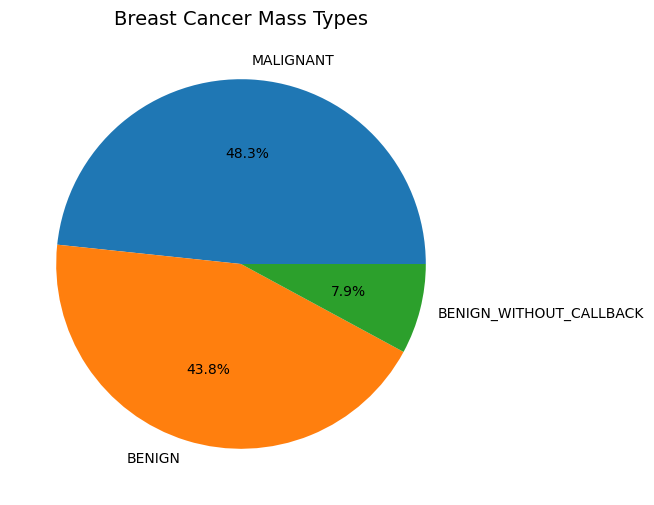

In [25]:
# pathology distributions
value = mass_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=14)
plt.savefig('/kaggle/working/pathology_distributions_red.png')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

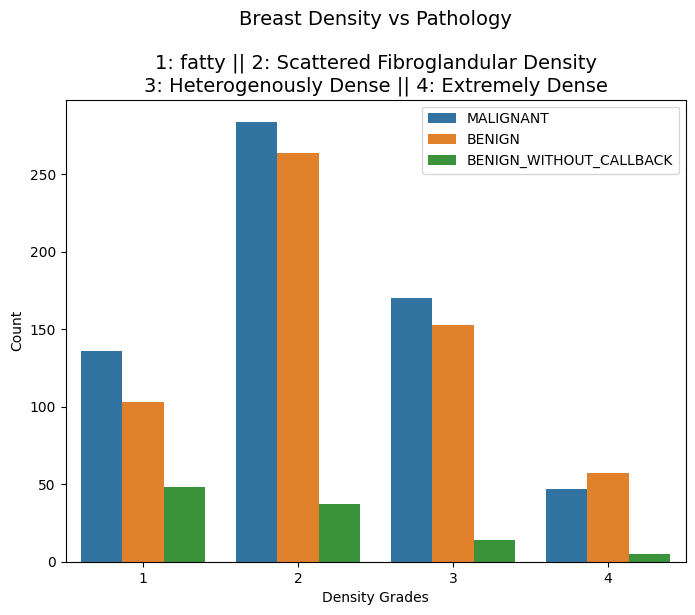

In [26]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()
plt.savefig('/kaggle/working/density_pathology_red.png')
plt.show()

Full Mammograms:



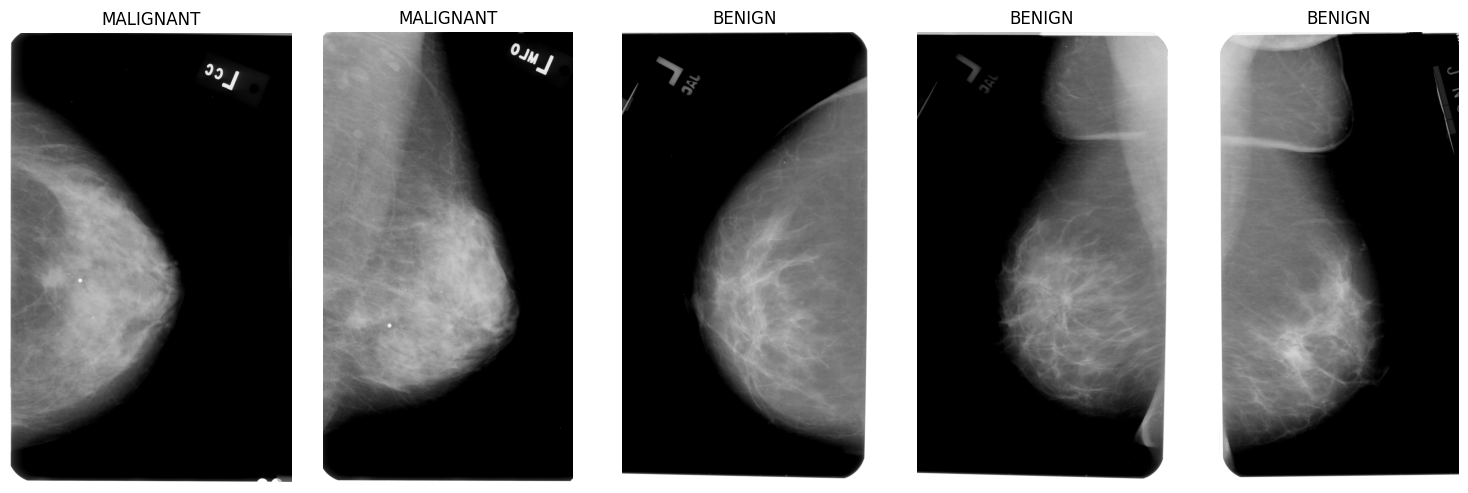

Cropped Mammograms:



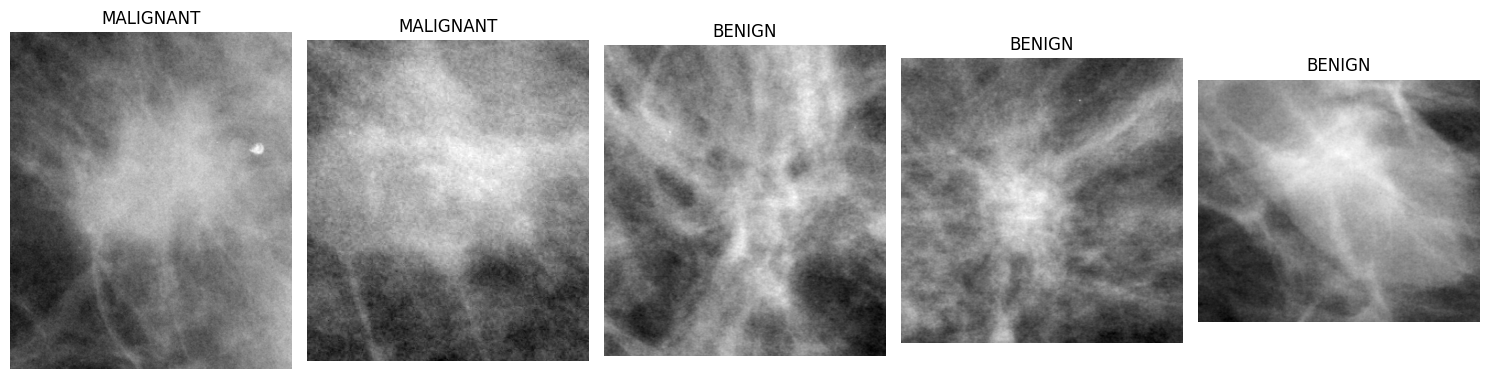

In [27]:
# Display some images
import matplotlib.image as mpimg

# create function to display images
def display_images(column, number):
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    
    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)

# Handle Categorical Data

## One Hot Encode

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np

# Merge datasets
full_mass = pd.concat([mass_train, mass_test], axis=0)

# Create a binary mapper
class_mapper = {
    'MALIGNANT': np.float32(1), 
    'BENIGN': np.float32(0), 
    'BENIGN_WITHOUT_CALLBACK': np.float32(0)} 

# Apply class mapper to pathology column
full_mass['labels'] = full_mass['pathology'].replace(class_mapper)

# One Hot Encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform="pandas"))
])

ohe_data = categorical_transformer.fit_transform(full_mass[[
    "image_view", 
    "left_or_right_breast", 
    "mass_shape",
    "mass_margins"
]])

full_mass_onehot = pd.merge(full_mass, ohe_data, left_index=True, right_index=True)

print(full_mass_onehot.shape)

# Check the number of classes
num_classes = len(full_mass_onehot['labels'].unique())

(1696, 58)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

## Create Subsets

In [29]:
class_1 = ["image_view", "left_or_right_breast"]
class_2 = ["mass_shape", "mass_margins"]

counter = 0

def oh_col_list(original_cols, counter_init_val):
    counter = counter_init_val
    oh_cols = []
    for col in original_cols:
        vals = full_mass_onehot[col].unique()
        for val in vals:
            oh_cols.append(f'x{counter}_{val}')
        counter += 1
    return oh_cols, counter

class_1_cols, counter = oh_col_list(class_1, 0)
class_2_cols, _ = oh_col_list(class_2, counter)
class_3_cols, _ = oh_col_list(class_1 + class_2, 0)

img_col_name = 'processed_images'
class_2_cols = class_2_cols + ['breast_density', 'subtlety']
class_3_cols = class_3_cols + ['breast_density', 'subtlety']
# class_4_cols = class_3_cols + ["subtlety"]

# Preprocessing of Images

In [30]:
import tensorflow as tf
from tensorflow import keras
import cv2
from sklearn.model_selection import train_test_split, KFold
from keras.utils import to_categorical, set_random_seed
set_random_seed(42)
np.random.seed(42)

In [31]:
def image_processor(image_path, target_size):
    """Preprocess images for CNN model"""
    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    #image_array = image / 255.0
    return image

# Define the target size
target_size = (224, 224, 3)

# Apply preprocessor to train data
image_column = full_mass_onehot['image_file_path'].apply(lambda x: image_processor(x, target_size))

In [32]:
full_mass_onehot[img_col_name] = image_column

In [33]:
# Splitting without a validation set in the training set
'''
X_train, X_test, y_train, y_test = train_test_split(full_mass_onehot, full_mass_onehot['labels'].values, test_size = 0.2, random_state = 42)

X_train_0 = np.asarray(X_train[img_col_name].to_list())
X_test_0 = np.asarray(X_test[img_col_name].to_list())
y_train = y_train
y_test = y_test

print(X_train[[img_col_name, "breast_density"]].head(1))
print(class_1_cols)
print([img_col_name, "breast_density"])

X_train_1 = np.asarray(X_train[class_1_cols])
X_test_1 = np.asarray(X_test[class_1_cols])

X_train_2 = np.asarray(X_train[class_2_cols])
X_test_2 = np.asarray(X_test[class_2_cols])

X_train_3 = np.asarray(X_train[class_3_cols])
X_test_3 = np.asarray(X_test[class_3_cols])

X_train_4 = np.asarray(X_train[class_4_cols])
X_test_4 = np.asarray(X_test[class_4_cols])

print('X_train_0 shape : {}' .format(X_train_0.shape))
print('X_test_0 shape : {}' .format(X_test_0.shape))
print('X_train_1 shape : {}' .format(X_train_1.shape[1]))
print('X_test_1 shape : {}' .format(X_test_1.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))
'''

'\nX_train, X_test, y_train, y_test = train_test_split(full_mass_onehot, full_mass_onehot[\'labels\'].values, test_size = 0.2, random_state = 42)\n\nX_train_0 = np.asarray(X_train[img_col_name].to_list())\nX_test_0 = np.asarray(X_test[img_col_name].to_list())\ny_train = y_train\ny_test = y_test\n\nprint(X_train[[img_col_name, "breast_density"]].head(1))\nprint(class_1_cols)\nprint([img_col_name, "breast_density"])\n\nX_train_1 = np.asarray(X_train[class_1_cols])\nX_test_1 = np.asarray(X_test[class_1_cols])\n\nX_train_2 = np.asarray(X_train[class_2_cols])\nX_test_2 = np.asarray(X_test[class_2_cols])\n\nX_train_3 = np.asarray(X_train[class_3_cols])\nX_test_3 = np.asarray(X_test[class_3_cols])\n\nX_train_4 = np.asarray(X_train[class_4_cols])\nX_test_4 = np.asarray(X_test[class_4_cols])\n\nprint(\'X_train_0 shape : {}\' .format(X_train_0.shape))\nprint(\'X_test_0 shape : {}\' .format(X_test_0.shape))\nprint(\'X_train_1 shape : {}\' .format(X_train_1.shape[1]))\nprint(\'X_test_1 shape : {}\

In [34]:
# Splitting with a validation set in the training set
# by splitting the training set again with 20% for validation set
X_train_preval, X_test, y_train_preval, y_test = train_test_split(full_mass_onehot, full_mass_onehot['labels'].values, test_size = 0.2, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_preval, y_train_preval, test_size=0.2, random_state=42)

X_train_0 = np.asarray(X_train[img_col_name].to_list())
X_val_0 = np.asarray(X_val[img_col_name].to_list())
X_test_0 = np.asarray(X_test[img_col_name].to_list())
y_train = y_train
y_test = y_test

print(X_train[[img_col_name, "breast_density"]].head(1))
print(class_1_cols)
print([img_col_name, "breast_density"])

X_train_1 = np.asarray(X_train[class_1_cols])
X_val_1 = np.asarray(X_val[class_1_cols])
X_test_1 = np.asarray(X_test[class_1_cols])

X_train_2 = np.asarray(X_train[class_2_cols])
X_val_2 = np.asarray(X_val[class_2_cols])
X_test_2 = np.asarray(X_test[class_2_cols])

X_train_3 = np.asarray(X_train[class_3_cols])
X_val_3 = np.asarray(X_val[class_3_cols])
X_test_3 = np.asarray(X_test[class_3_cols])

print('X_train_0 shape : {}' .format(X_train_0.shape))
print('X_test_0 shape : {}' .format(X_test_0.shape))
print('X_train_1 shape : {}' .format(X_train_1.shape[1]))
print('X_test_1 shape : {}' .format(X_test_1.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

                                      processed_images  breast_density
552  [[[255, 255, 255], [255, 255, 255], [255, 255,...               1
['x0_CC', 'x0_MLO', 'x1_LEFT', 'x1_RIGHT']
['processed_images', 'breast_density']
X_train_0 shape : (1084, 224, 224, 3)
X_test_0 shape : (340, 224, 224, 3)
X_train_1 shape : 4
X_test_1 shape : (340, 4)
y_train shape : (1084,)
y_test shape : (340,)


# CNN Architecture

In [35]:
from keras.models import Model
from keras import layers
from keras.applications.vgg19 import VGG19
from keras.applications.xception import Xception
from keras import metrics
from keras.callbacks import LambdaCallback

In [36]:
vgg19_train_input = keras.applications.vgg19.preprocess_input(X_train_0)
vgg19_val_input = keras.applications.vgg19.preprocess_input(X_val_0)
vgg19_test_input = keras.applications.vgg19.preprocess_input(X_test_0)
xception_train_input = keras.applications.xception.preprocess_input(X_train_0)
xception_val_input = keras.applications.xception.preprocess_input(X_val_0)
xception_test_input = keras.applications.xception.preprocess_input(X_test_0)

In [37]:
def original_model(input_shape):
    input_img = layers.Input(shape=input_shape)
    a = layers.Conv2D(32, 3, padding='valid', activation='relu')(input_img)
    a = layers.MaxPooling2D()(a)
    a = layers.Conv2D(64, 3, padding='valid', activation='relu')(a)
    a = layers.MaxPooling2D()(a)
    a = layers.Flatten()(a)
    a = layers.Dense(64)(a)
    a = layers.Dense(1, activation='sigmoid')(a)
    return Model(inputs=input_img, outputs=a)

def vgg19_model():
    vgg19_model = VGG19(include_top=False, weights='imagenet')
    for layer in vgg19_model.layers:
        layer.trainable=False
    c = layers.GlobalMaxPooling2D()(vgg19_model.output)
    c = layers.Dense(2048, activation='relu')(c)
    c = layers.Dropout(0.005)(c)
    c = layers.Dense(1024, activation='relu')(c)
    c = layers.Dropout(0.005)(c)
    c = layers.Dense(1024, activation='relu')(c)
    c = layers.Dense(1, activation='sigmoid')(c)
    return Model(inputs=vgg19_model.input, outputs=c)

def xception_model():
    xception_model = Xception(include_top=False, weights='imagenet')
    for layer in xception_model.layers:
        layer.trainable=False
    c = layers.GlobalMaxPooling2D()(xception_model.output)
    c = layers.Dense(1024, activation='relu')(c)
    c = layers.Dropout(0.005)(c)
    c = layers.Dense(512, activation='relu')(c)
    c = layers.Dense(1, activation='sigmoid')(c)
    return Model(inputs=xception_model.input, outputs=c)

def cat_model(input_shape):
    input_cat = layers.Input(shape=input_shape)
    b = layers.Dense(32, activation="relu")(input_cat)
    b = layers.Dense(32, activation="relu")(b)
    b = layers.Dense(1, activation="sigmoid")(b)
    return Model(inputs=input_cat, outputs=b)

def combo_model(image_model, cat_input_shape):
    a = image_model
    b = cat_model(cat_input_shape)
    print("Image output pre-concat: ", (a.output))
    print("Categorical output pre-concat: ", b.output)
    c = layers.concatenate([a.output, b.output], name="concat_layer")
    #c = layers.BatchNormalization()(c)
    c = layers.Dense(units=12, kernel_regularizer="l1", kernel_constraint=keras.constraints.MaxNorm(max_value=1., axis=1), name="first_dense_layer")(c)
    c = layers.Reshape((3,4))(c)
    c = layers.Conv1D(2, 2, padding='valid', activation='relu')(c)
    c = layers.MaxPooling1D()(c)
    c = layers.Flatten()(c)
    c = layers.Dense(4)(c)
    c = layers.Dense(1, activation="sigmoid")(c)
    model = Model(inputs=[a.input, b.input], outputs=c)
    #print(model.summary())

    return model

def og_combo_model(image_model, cat_input_shape):
    a = image_model
    b = cat_model(cat_input_shape)
    print("Image output pre-concat: ", (a.output))
    print("Categorical output pre-concat: ", b.output)
    c = layers.concatenate([a.output, b.output], name="concat_layer")
    c = layers.Dense(units=2, activation="relu")(c)
    c = layers.Dense(1, activation="sigmoid")(c)
    model = Model(inputs=[a.input, b.input], outputs=c)
    #print(model.summary())

    return model
    

# Parameters

In [136]:
# Compile
model_optimizer_OLD = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
model_optimizer = "rmsprop"
model_metrics = [
    metrics.BinaryAccuracy(),
    metrics.Recall(),
    metrics.Precision(),
    metrics.F1Score()
]

# Fit
batch_size = 32
epochs=12

In [39]:
from keras.models import Model
from keras import metrics
from keras.optimizers.schedules import ExponentialDecay, PiecewiseConstantDecay

lr_scheduler1 = ExponentialDecay(initial_learning_rate=0.99, decay_steps=10000000000, decay_rate=0.95)
lr_scheduler2 = PiecewiseConstantDecay([100000000000000], [1.0, 0.4])
sgd_optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.4, nesterov=False)

def train_combo_model(image_input, cat_input, image_model, labels, img_val, cat_val, y_val):
    model = combo_model(image_model, cat_input.shape[1])
    model.compile(
        loss='binary_crossentropy', 
        optimizer=model_optimizer,
        metrics=model_metrics
    )
    print_outputs = LambdaCallback(on_epoch_end=lambda batch, logs: print("Layer output: ", keras.backend.eval(model.get_layer("concat_layer"))))
    print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print("Layer weights: ", np.linalg.norm(model.get_layer("first_dense_layer").get_weights()[0]),np.linalg.norm(model.get_layer("first_dense_layer").get_weights()[1])))
    history = model.fit([image_input, cat_input], labels, batch_size=batch_size, epochs=epochs, validation_data=([img_val, cat_val], y_val),verbose=2, callbacks = [print_outputs, print_weights])
    return model, history

def train_og_combo_model(image_input, cat_input, image_model, labels, img_val, cat_val, y_val):
    model = combo_model(image_model, cat_input.shape[1])
    model.compile(
        loss='binary_crossentropy', 
        optimizer=model_optimizer,
        metrics=model_metrics
    )
    print_outputs = LambdaCallback(on_epoch_end=lambda batch, logs: print("Layer output: ", keras.backend.eval(model.get_layer("concat_layer"))))
    print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print("Layer weights: ", np.linalg.norm(model.get_layer("first_dense_layer").get_weights()[0]),np.linalg.norm(model.get_layer("first_dense_layer").get_weights()[1])))
    history = model.fit([image_input, cat_input], labels, batch_size=batch_size, epochs=epochs, validation_data=([img_val, cat_val], y_val),verbose=2, callbacks = [print_outputs, print_weights])
    return model, history

# Training and Evaluation

# Categorical Data Only

In [40]:
def train_cat_model(x, y, x_val, y_val):
    model = cat_model(x.shape[1])
    model.compile(
        loss='binary_crossentropy', 
        # optimizer=keras.optimizers.Adam(learning_rate=0.001),
        optimizer=model_optimizer,
        metrics=model_metrics
    )
    history = model.fit([x], y, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=2)
    return model, history
    
cat_model_1, cat_1_fit_history = train_cat_model(X_train_1, y_train, X_val_1, y_val)
cat_model_2, cat_2_fit_history = train_cat_model(X_train_2, y_train, X_val_2, y_val)
cat_model_3, cat_3_fit_history = train_cat_model(X_train_3, y_train, X_val_3, y_val)
    
print("")
cat_1_eval_history = cat_model_1.evaluate(X_test_1, y_test)
cat_2_eval_history = cat_model_2.evaluate(X_test_2, y_test)
cat_3_eval_history = cat_model_3.evaluate(X_test_3, y_test)

Epoch 1/12
34/34 - 3s - loss: 0.6959 - binary_accuracy: 0.5277 - recall: 0.0559 - precision: 0.4179 - f1_score: 0.6322 - val_loss: 0.6969 - val_binary_accuracy: 0.5441 - val_recall: 0.3233 - val_precision: 0.5584 - val_f1_score: 0.6568 - 3s/epoch - 78ms/step
Epoch 2/12
34/34 - 0s - loss: 0.6921 - binary_accuracy: 0.5268 - recall: 0.0319 - precision: 0.3636 - f1_score: 0.6322 - val_loss: 0.6929 - val_binary_accuracy: 0.5110 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_f1_score: 0.6568 - 145ms/epoch - 4ms/step
Epoch 3/12
34/34 - 0s - loss: 0.6908 - binary_accuracy: 0.5323 - recall: 0.0180 - precision: 0.3750 - f1_score: 0.6322 - val_loss: 0.6909 - val_binary_accuracy: 0.5110 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_f1_score: 0.6568 - 145ms/epoch - 4ms/step
Epoch 4/12
34/34 - 0s - loss: 0.6908 - binary_accuracy: 0.5277 - recall: 0.0160 - precision: 0.2963 - f1_score: 0.6322 - val_loss: 0.6898 - val_binary_accuracy: 0.5110 - val_recall: 0.0000e+00 - val_prec

# Original Combo Model

In [41]:
og_combo_model_1, og_combo_1_fit_history = train_og_combo_model(X_train_0, X_train_1, original_model(target_size), y_train, X_val_0, X_val_1, y_val)
print("")
og_combo_model_2, og_combo_2_fit_history = train_og_combo_model(X_train_0, X_train_2, original_model(target_size), y_train, X_val_0, X_val_2, y_val)
print("")
og_combo_model_3, og_combo_3_fit_history = train_og_combo_model(X_train_0, X_train_3, original_model(target_size), y_train, X_val_0, X_val_3, y_val)

Image output pre-concat:  KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_10/Sigmoid:0', description="created by layer 'dense_10'")
Categorical output pre-concat:  KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_13/Sigmoid:0', description="created by layer 'dense_13'")
Epoch 1/12
Layer output:  <keras.src.layers.merging.concatenate.Concatenate object at 0x7b157010ff40>
Layer weights:  1.3196287 0.042376947
34/34 - 7s - loss: 0.7543 - binary_accuracy: 0.5309 - recall: 0.5453 - precision: 0.4883 - f1_score: 0.6275 - val_loss: 0.7468 - val_binary_accuracy: 0.5110 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_f1_score: 0.6568 - 7s/epoch - 200ms/step
Epoch 2/12
Layer output:  <keras.src.layers.merging.concatenate.Concatenate object at 0x7b157010ff40>
Layer weights:  1.2318423 0.055784427
34/34 - 1s - loss: 0.7431 - binary_accuracy: 0.5378 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1_sco

In [44]:
og_combo_1_eval_history = og_combo_model_1.evaluate([X_test_0, X_test_1], y_test)
og_combo_2_eval_history = og_combo_model_2.evaluate([X_test_0, X_test_2], y_test)
og_combo_3_eval_history = og_combo_model_3.evaluate([X_test_0, X_test_3], y_test)

11/11 [==============================] - 0s 9ms/step - loss: 0.6044 - binary_accuracy: 0.7088 - recall: 0.7533 - precision: 0.6457 - f1_score: 0.6122


# Original Kex Model

In [137]:
og_model_0 = original_model(target_size)
og_model_0.compile(optimizer=model_optimizer, 
               loss='binary_crossentropy',
               metrics=[
                    metrics.BinaryAccuracy(),
                    metrics.Recall(),
                    metrics.Precision(),
                    metrics.F1Score()]
              )
og_0_fit_history = og_model_0.fit(X_train_0, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val_0, y_val) ,verbose=2)
og_0_eval_history = og_model_0.evaluate(X_test_0, y_test)

Epoch 1/12
34/34 - 2s - loss: 3158.9070 - binary_accuracy: 0.5074 - recall_9: 0.4970 - precision_9: 0.4689 - f1_score: 0.4803 - val_loss: 1568.8715 - val_binary_accuracy: 0.5110 - val_recall_9: 0.0000e+00 - val_precision_9: 0.0000e+00 - val_f1_score: 0.0000e+00 - 2s/epoch - 73ms/step
Epoch 2/12
34/34 - 1s - loss: 980.8622 - binary_accuracy: 0.5397 - recall_9: 0.4890 - precision_9: 0.5020 - f1_score: 0.4955 - val_loss: 786.0030 - val_binary_accuracy: 0.5515 - val_recall_9: 0.8947 - val_precision_9: 0.5242 - val_f1_score: 0.6593 - 757ms/epoch - 22ms/step
Epoch 3/12
34/34 - 1s - loss: 766.3041 - binary_accuracy: 0.5618 - recall_9: 0.5429 - precision_9: 0.5251 - f1_score: 0.5328 - val_loss: 472.1962 - val_binary_accuracy: 0.5882 - val_recall_9: 0.2030 - val_precision_9: 0.8182 - val_f1_score: 0.3452 - 751ms/epoch - 22ms/step
Epoch 4/12
34/34 - 1s - loss: 467.2177 - binary_accuracy: 0.5803 - recall_9: 0.5449 - precision_9: 0.5460 - f1_score: 0.5482 - val_loss: 416.7653 - val_binary_accuracy

In [138]:
og_model_1, og_1_fit_history = train_combo_model(X_train_0, X_train_1, original_model(target_size), y_train, X_val_0, X_val_1, y_val)
print("")
og_model_2, og_2_fit_history = train_combo_model(X_train_0, X_train_2, original_model(target_size), y_train, X_val_0, X_val_2, y_val)
print("")
og_model_3, og_3_fit_history = train_combo_model(X_train_0, X_train_3, original_model(target_size), y_train, X_val_0, X_val_3, y_val)

Image output pre-concat:  KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_285/Sigmoid:0', description="created by layer 'dense_285'")
Categorical output pre-concat:  KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_288/Sigmoid:0', description="created by layer 'dense_288'")
Epoch 1/12
Layer output:  <keras.src.layers.merging.concatenate.Concatenate object at 0x7b15702c50c0>
Layer weights:  1.2609172 0.041025545
34/34 - 4s - loss: 0.7510 - binary_accuracy: 0.4926 - recall_8: 0.3533 - precision_8: 0.4392 - f1_score: 0.6322 - val_loss: 0.7444 - val_binary_accuracy: 0.5110 - val_recall_8: 0.0000e+00 - val_precision_8: 0.0000e+00 - val_f1_score: 0.6568 - 4s/epoch - 126ms/step
Epoch 2/12
Layer output:  <keras.src.layers.merging.concatenate.Concatenate object at 0x7b15702c50c0>
Layer weights:  1.1255691 0.06716424
34/34 - 1s - loss: 0.7399 - binary_accuracy: 0.5378 - recall_8: 0.0000e+00 - precision_8: 0.00

In [139]:
og_1_eval_history = og_model_1.evaluate([X_test_0, X_test_1], y_test)
og_2_eval_history = og_model_2.evaluate([X_test_0, X_test_2], y_test)
og_3_eval_history = og_model_3.evaluate([X_test_0, X_test_3], y_test)

11/11 [==============================] - 0s 9ms/step - loss: 0.5991 - binary_accuracy: 0.7235 - recall_8: 0.7600 - precision_8: 0.6628 - f1_score: 0.6122


# XCeption Models

In [141]:
xception_model_0 = xception_model()

xception_model_0.compile(optimizer=model_optimizer, 
               loss='binary_crossentropy',
               metrics=model_metrics
                        )
xception_0_fit_history = xception_model_0.fit(xception_train_input, y_train, batch_size=batch_size, epochs=epochs, validation_data=(xception_val_input, y_val) ,verbose=2)
xception_0_eval_history = xception_model_0.evaluate(xception_test_input, y_test)

Epoch 1/12
34/34 - 8s - loss: 1.6891 - binary_accuracy: 0.5042 - recall_8: 0.5960 - precision_8: 0.4669 - f1_score: 0.6265 - val_loss: 0.6854 - val_binary_accuracy: 0.5221 - val_recall_8: 0.2406 - val_precision_8: 0.5246 - val_f1_score: 0.6568 - 8s/epoch - 235ms/step
Epoch 2/12
34/34 - 3s - loss: 0.7303 - binary_accuracy: 0.5018 - recall_8: 0.4431 - precision_8: 0.4596 - f1_score: 0.6322 - val_loss: 0.6719 - val_binary_accuracy: 0.5993 - val_recall_8: 0.8045 - val_precision_8: 0.5632 - val_f1_score: 0.6568 - 3s/epoch - 94ms/step
Epoch 3/12
34/34 - 3s - loss: 0.7093 - binary_accuracy: 0.5387 - recall_8: 0.4930 - precision_8: 0.5010 - f1_score: 0.6322 - val_loss: 0.7739 - val_binary_accuracy: 0.5147 - val_recall_8: 0.9774 - val_precision_8: 0.5019 - val_f1_score: 0.6568 - 3s/epoch - 94ms/step
Epoch 4/12
34/34 - 3s - loss: 0.7249 - binary_accuracy: 0.5387 - recall_8: 0.4591 - precision_8: 0.5011 - f1_score: 0.6322 - val_loss: 0.6653 - val_binary_accuracy: 0.5662 - val_recall_8: 0.1203 - v

In [48]:
xception_model_1, xception_1_fit_history = train_combo_model(xception_train_input, X_train_1, xception_model(), y_train, xception_val_input, X_val_1, y_val)
print("")
xception_model_2, xception_2_fit_history = train_combo_model(xception_train_input, X_train_2, xception_model(), y_train, xception_val_input, X_val_2, y_val)
print("")
xception_model_3, xception_3_fit_history = train_combo_model(xception_train_input, X_train_3, xception_model(), y_train, xception_val_input, X_val_3, y_val)

Image output pre-concat:  KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_60/Sigmoid:0', description="created by layer 'dense_60'")
Categorical output pre-concat:  KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_63/Sigmoid:0', description="created by layer 'dense_63'")
Epoch 1/12
Layer output:  <keras.src.layers.merging.concatenate.Concatenate object at 0x7b14c0dd6e60>
Layer weights:  1.306368 0.02472004
34/34 - 10s - loss: 0.7505 - binary_accuracy: 0.5520 - recall: 0.0507 - precision: 0.6226 - f1_score: 0.6275 - val_loss: 0.7494 - val_binary_accuracy: 0.5110 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_f1_score: 0.6568 - 10s/epoch - 304ms/step
Epoch 2/12
Layer output:  <keras.src.layers.merging.concatenate.Concatenate object at 0x7b14c0dd6e60>
Layer weights:  1.2136706 0.03261716
34/34 - 3s - loss: 0.7420 - binary_accuracy: 0.5378 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1_scor

In [49]:
xception_1_eval_history = xception_model_1.evaluate([xception_test_input, X_test_1], y_test)
xception_2_eval_history = xception_model_2.evaluate([xception_test_input, X_test_2], y_test)
xception_3_eval_history = xception_model_3.evaluate([xception_test_input, X_test_3], y_test)

11/11 [==============================] - 1s 74ms/step - loss: 0.5937 - binary_accuracy: 0.7235 - recall: 0.7333 - precision: 0.6707 - f1_score: 0.6122


# VGG19 Models

In [51]:
vgg19_model_0 = vgg19_model()

vgg19_model_0.compile(optimizer=model_optimizer, 
               loss='binary_crossentropy',
               metrics=[
                    metrics.BinaryAccuracy(),
                    metrics.Recall(),
                    metrics.Precision(),
                    metrics.F1Score()]
              )

vgg19_0_fit_history = vgg19_model_0.fit(vgg19_train_input, y_train, batch_size=batch_size, epochs=epochs, validation_data=(vgg19_val_input, y_val), verbose=2)
vgg19_0_eval_history = vgg19_model_0.evaluate(vgg19_test_input, y_test)

Epoch 1/12
34/34 - 11s - loss: 66.5183 - binary_accuracy: 0.4991 - recall_2: 0.4731 - precision_2: 0.4593 - f1_score: 0.6201 - val_loss: 1.6894 - val_binary_accuracy: 0.5147 - val_recall_2: 0.0075 - val_precision_2: 1.0000 - val_f1_score: 0.6568 - 11s/epoch - 336ms/step
Epoch 2/12
34/34 - 3s - loss: 1.8772 - binary_accuracy: 0.5148 - recall_2: 0.4950 - precision_2: 0.4760 - f1_score: 0.6322 - val_loss: 1.0586 - val_binary_accuracy: 0.5110 - val_recall_2: 0.0000e+00 - val_precision_2: 0.0000e+00 - val_f1_score: 0.6568 - 3s/epoch - 99ms/step
Epoch 3/12
34/34 - 3s - loss: 1.8665 - binary_accuracy: 0.5129 - recall_2: 0.4790 - precision_2: 0.4734 - f1_score: 0.6317 - val_loss: 0.8935 - val_binary_accuracy: 0.4890 - val_recall_2: 1.0000 - val_precision_2: 0.4890 - val_f1_score: 0.6568 - 3s/epoch - 99ms/step
Epoch 4/12
34/34 - 3s - loss: 1.1013 - binary_accuracy: 0.5434 - recall_2: 0.5130 - precision_2: 0.5059 - f1_score: 0.6322 - val_loss: 0.8608 - val_binary_accuracy: 0.5221 - val_recall_2:

In [142]:
vgg19_model_1, vgg19_1_fit_history = train_combo_model(vgg19_train_input, X_train_1, vgg19_model(), y_train, vgg19_val_input, X_val_1, y_val)
print("")
vgg19_model_2, vgg19_2_fit_history = train_combo_model(vgg19_train_input, X_train_2, vgg19_model(), y_train, vgg19_val_input, X_val_2, y_val)
print("")
vgg19_model_3, vgg19_3_fit_history = train_combo_model(vgg19_train_input, X_train_3, vgg19_model(), y_train, vgg19_val_input, X_val_3, y_val)

Image output pre-concat:  KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_314/Sigmoid:0', description="created by layer 'dense_314'")
Categorical output pre-concat:  KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_317/Sigmoid:0', description="created by layer 'dense_317'")
Epoch 1/12
Layer output:  <keras.src.layers.merging.concatenate.Concatenate object at 0x7b1620b76ad0>
Layer weights:  1.2995135 0.023770684
34/34 - 8s - loss: 0.7466 - binary_accuracy: 0.5463 - recall_8: 0.1551 - precision_8: 0.5127 - f1_score: 0.6275 - val_loss: 0.7472 - val_binary_accuracy: 0.5110 - val_recall_8: 0.0000e+00 - val_precision_8: 0.0000e+00 - val_f1_score: 0.6568 - 8s/epoch - 225ms/step
Epoch 2/12
Layer output:  <keras.src.layers.merging.concatenate.Concatenate object at 0x7b1620b76ad0>
Layer weights:  1.2097292 0.03734881
34/34 - 3s - loss: 0.7390 - binary_accuracy: 0.5378 - recall_8: 0.0000e+00 - precision_8: 0.00

In [143]:
vgg19_1_eval_history = vgg19_model_1.evaluate([vgg19_test_input, X_test_1], y_test)
vgg19_1_eval_history = vgg19_model_2.evaluate([vgg19_test_input, X_test_2], y_test)
vgg19_1_eval_history = vgg19_model_3.evaluate([vgg19_test_input, X_test_3], y_test)

11/11 [==============================] - 1s 78ms/step - loss: 0.5853 - binary_accuracy: 0.7265 - recall_8: 0.7733 - precision_8: 0.6629 - f1_score: 0.6122


# Graphs

In [193]:
def broken_loss_graph(history, top_upper_lim, top_lower_lim, bottom_upper_lim, bottom_lower_lim):
    pts1 = history['loss']
    pts2 = history['val_loss']
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.subplots_adjust(hspace=0.05)  # adjust space between axes

    # plot the same data on both axes
    ax1.plot(pts1, label='Training loss')
    ax2.plot(pts1, label='Training loss')
    ax1.plot(pts2, label='Validation loss')
    ax2.plot(pts2, label='Validation loss')

    # zoom-in / limit the view to different portions of the data
    ax1.set_ylim(top_lower_lim, top_upper_lim)  # outliers only
    ax2.set_ylim(bottom_lower_lim, bottom_upper_lim)  # most of the data

    # hide the spines between ax and ax2
    ax1.spines.bottom.set_visible(False)
    ax2.spines.top.set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(top = False) 
    ax1.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    # Now, let's turn towards the cut-out slanted lines.
    # We create line objects in axes coordinates, in which (0,0), (0,1),
    # (1,0), and (1,1) are the four corners of the axes.
    # The slanted lines themselves are markers at those locations, such that the
    # lines keep their angle and position, independent of the axes size or scale
    # Finally, we need to disable clipping.

    d = .7  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    
    ax1.legend(loc="upper right")
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

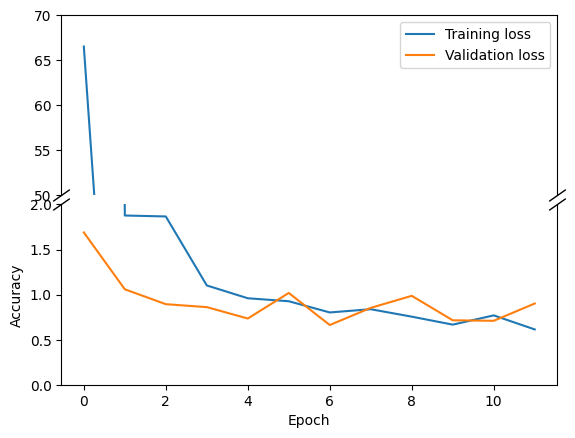

In [194]:
broken_loss_graph(vgg19_0_fit_history.history, 70., 50., 2., 0)

In [211]:
import matplotlib.pyplot as plt

def accuracy_graph(history, title):
    # Visualize model history
    plt.plot(history['binary_accuracy'], label='Training accuracy')
    plt.plot(history['val_binary_accuracy'], label='Validation accuracy')
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc="upper left")
    plt.show()
    
def loss_graph(history, title):
    plt.plot(history['loss'], label='Training loss')
    plt.plot(history['val_loss'], label='Validation loss')
    plt.title(title)
    plt.ylabel('Loss value')
    plt.xlabel('Epoch')
    plt.legend(loc="upper right")
    plt.show()
    
def recall_graph(history, title):
    keys = list(history.keys())
    train_recall = keys[2]
    train_precision = keys[3]
    val_recall = keys[7]
    val_precision = keys[8]
    print(f'{train_recall}, {train_precision}, {val_recall}, {val_precision}')
    # Visualize model history
    plt.plot(history[train_recall], label='Training recall')
    plt.plot(history[train_precision], label='Validation recall')
    plt.title(title)
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(loc="upper left")
    plt.show()

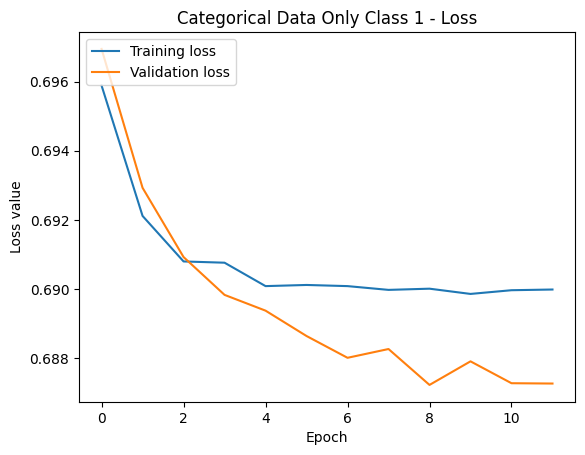

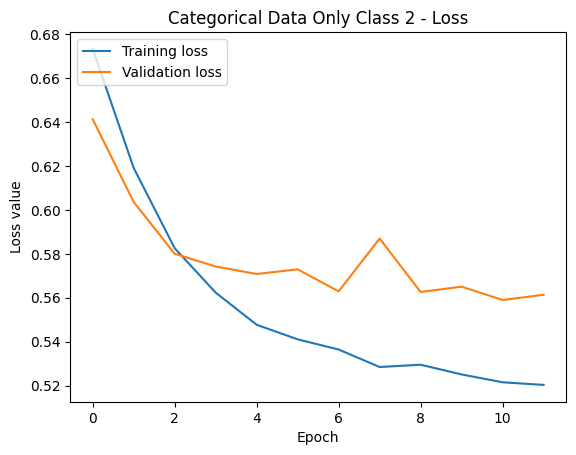

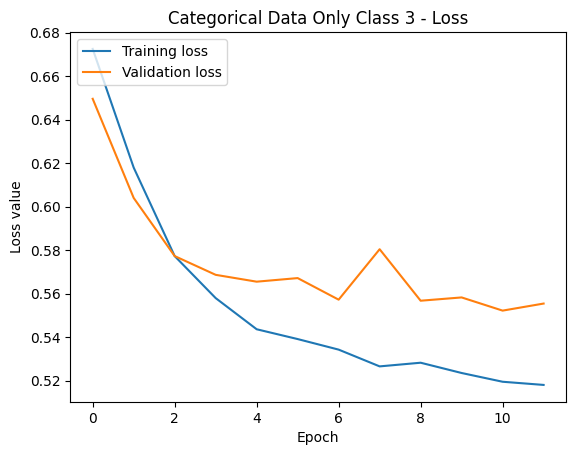

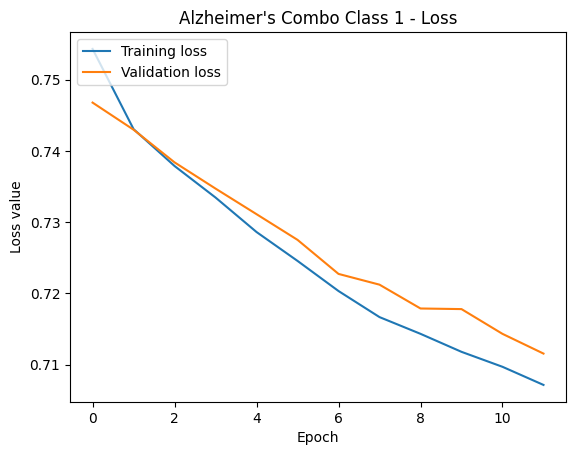

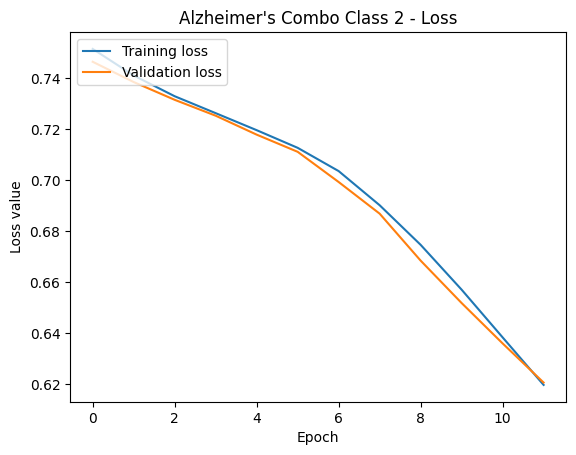

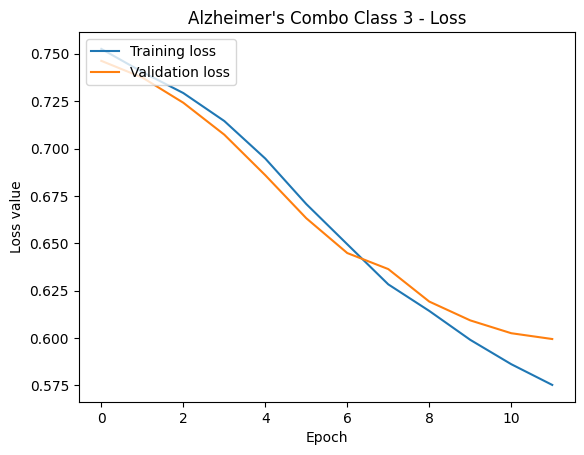

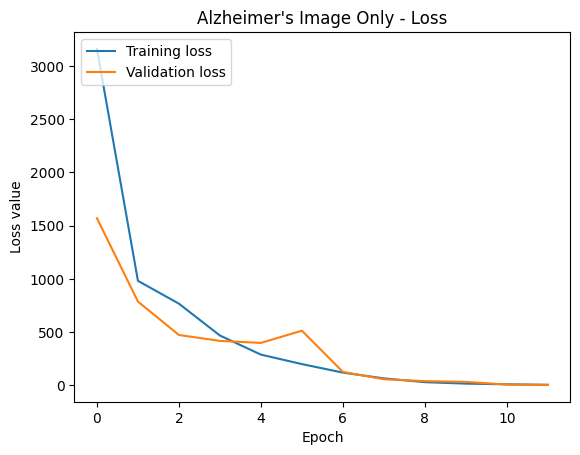

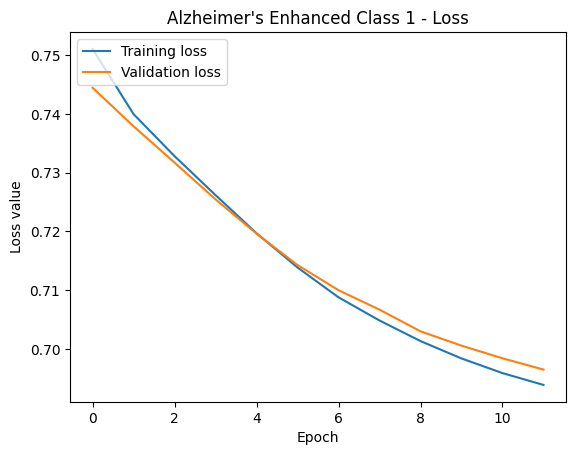

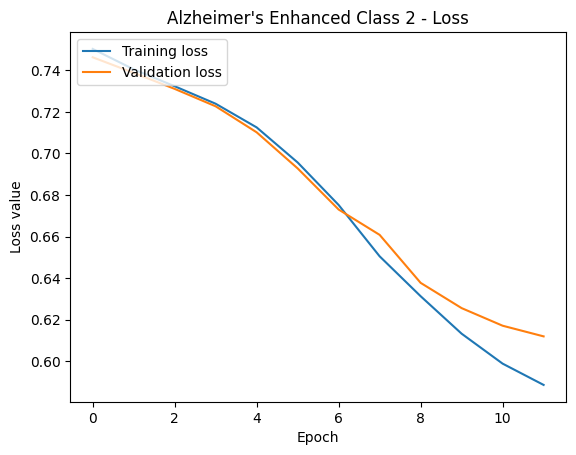

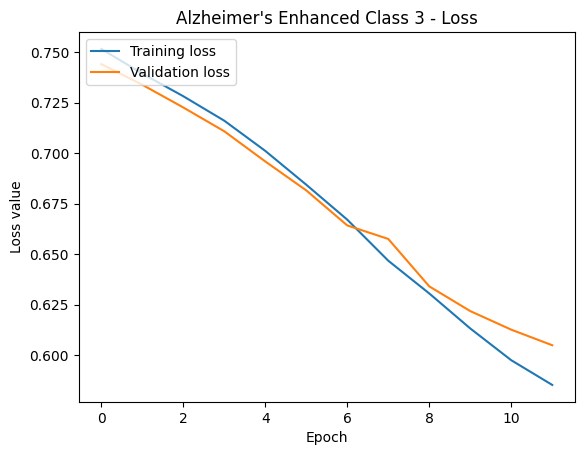

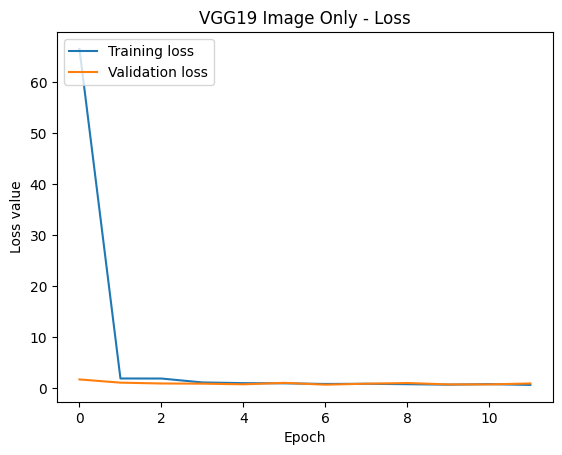

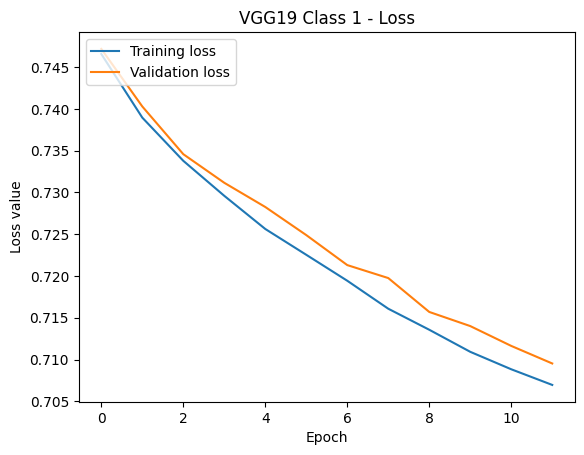

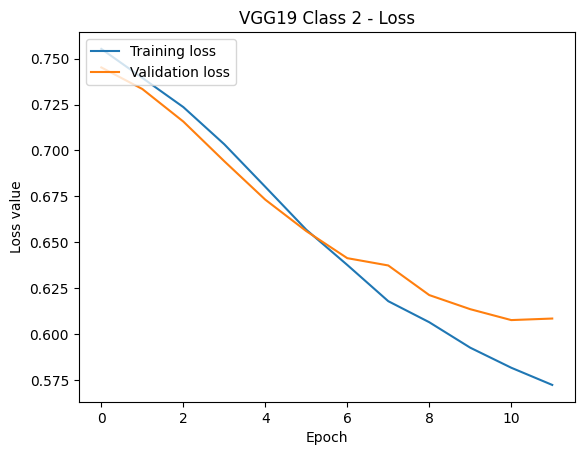

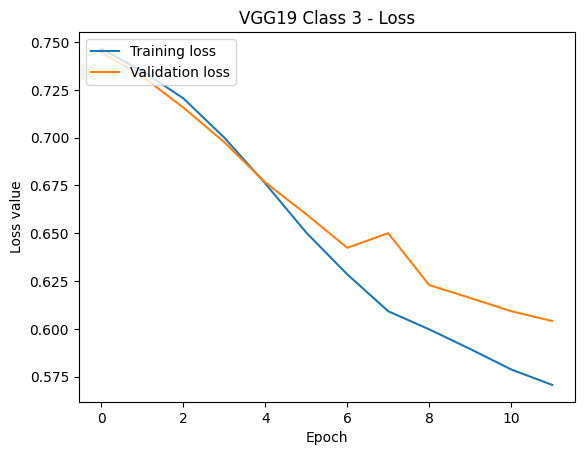

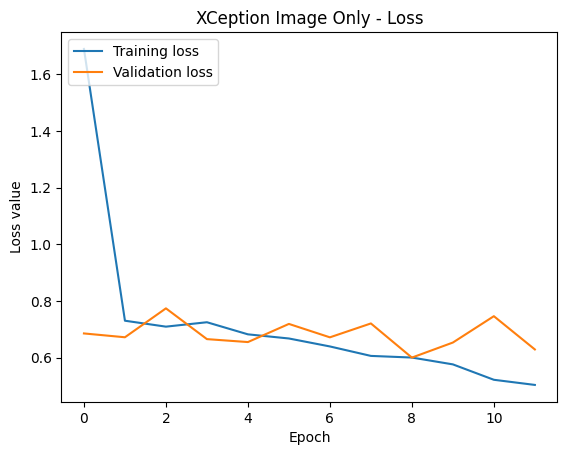

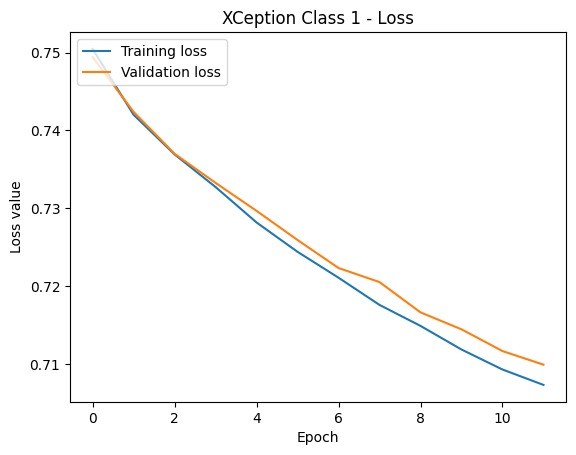

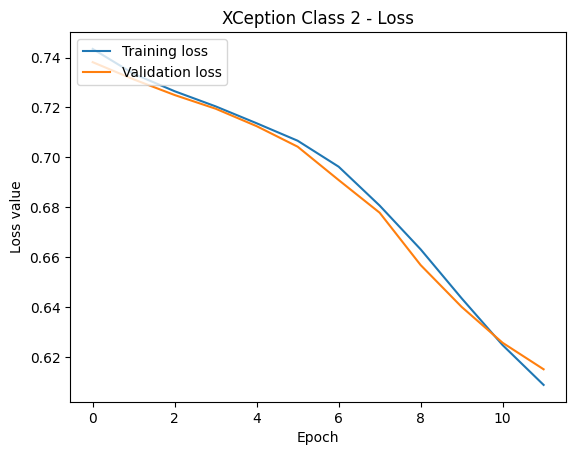

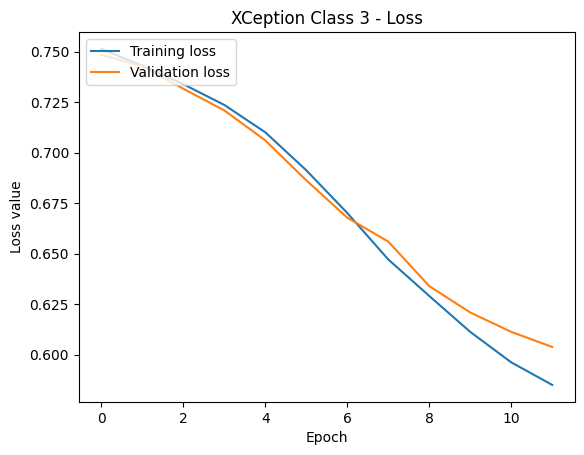

In [199]:
# Loss graphs
loss_graph(cat_1_fit_history.history, "Categorical Data Only Class 1 - Loss")
loss_graph(cat_2_fit_history.history, "Categorical Data Only Class 2 - Loss")
loss_graph(cat_3_fit_history.history, "Categorical Data Only Class 3 - Loss")

loss_graph(og_combo_1_fit_history.history, "Alzheimer's Combo Class 1 - Loss")
loss_graph(og_combo_2_fit_history.history, "Alzheimer's Combo Class 2 - Loss")
loss_graph(og_combo_3_fit_history.history, "Alzheimer's Combo Class 3 - Loss")

loss_graph(og_0_fit_history.history, "Alzheimer's Image Only - Loss")
loss_graph(og_1_fit_history.history, "Alzheimer's Enhanced Class 1 - Loss")
loss_graph(og_2_fit_history.history, "Alzheimer's Enhanced Class 2 - Loss")
loss_graph(og_3_fit_history.history, "Alzheimer's Enhanced Class 3 - Loss")

loss_graph(vgg19_0_fit_history.history, "VGG19 Image Only - Loss")
loss_graph(vgg19_1_fit_history.history, "VGG19 Class 1 - Loss")
loss_graph(vgg19_2_fit_history.history, "VGG19 Class 2 - Loss")
loss_graph(vgg19_3_fit_history.history, "VGG19 Class 3 - Loss")

loss_graph(xception_0_fit_history.history, "XCeption Image Only - Loss")
loss_graph(xception_1_fit_history.history, "XCeption Class 1 - Loss")
loss_graph(xception_2_fit_history.history, "XCeption Class 2 - Loss")
loss_graph(xception_3_fit_history.history, "XCeption Class 3 - Loss")


Categorical Data Only Class 1 - Loss


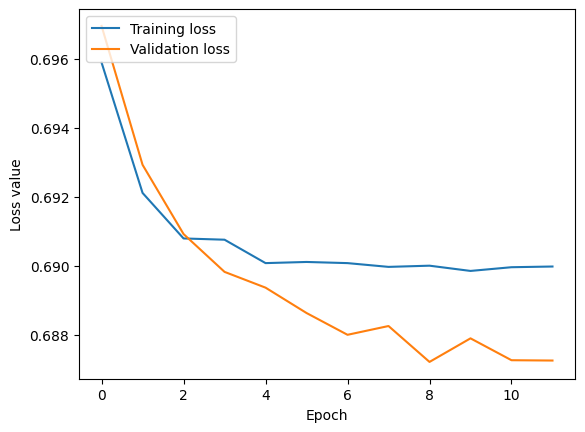


Categorical Data Only Class 2 - Loss


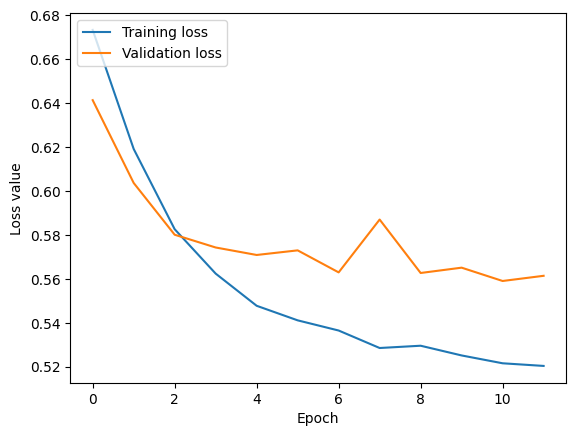


Categorical Data Only Class 3 - Loss


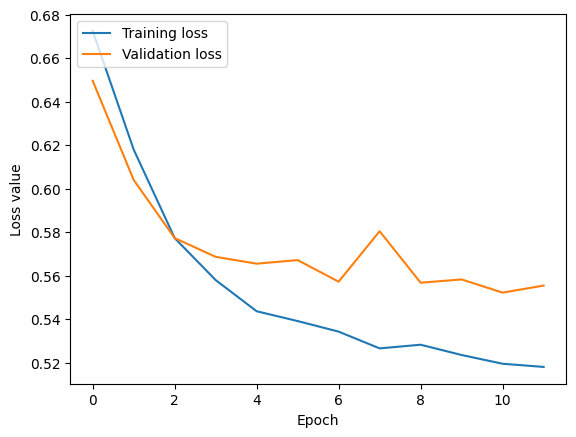

\Alzheimer's Combo Class 1 - Loss


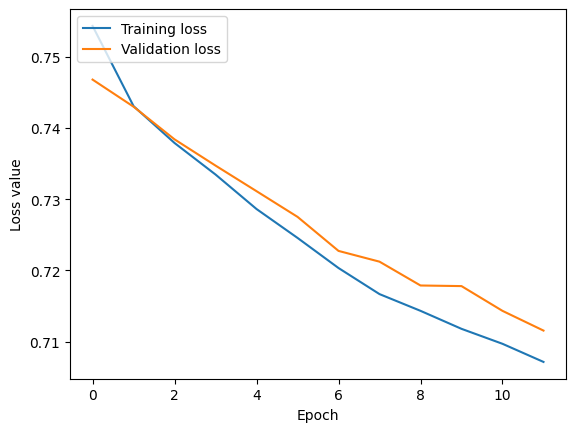

\Alzheimer's Combo Class 2 - Loss


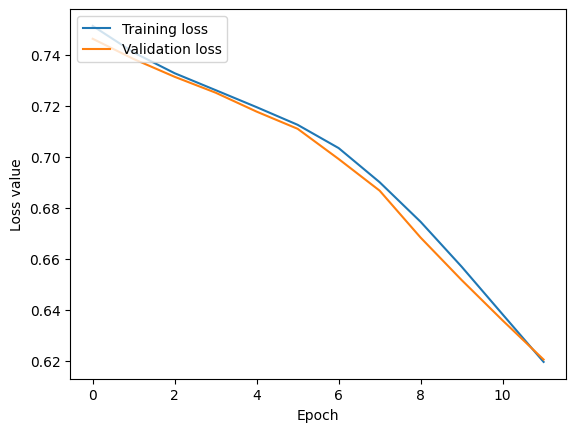

\Alzheimer's Combo Class 3 - Loss


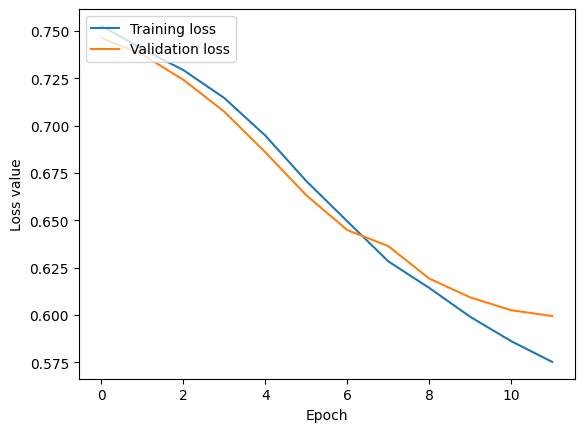


Alzheimer's Image Only - Loss


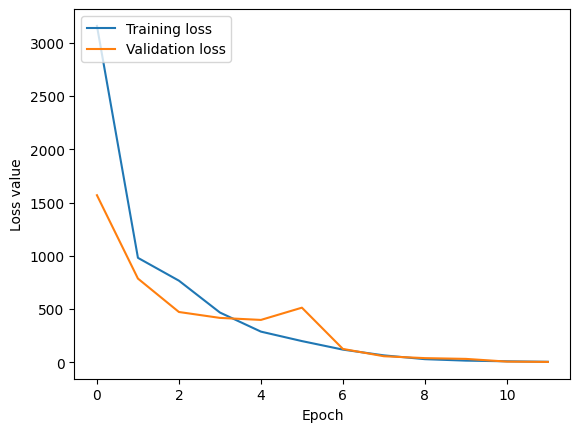


Alzheimer's Enhanced Class 1 - Loss


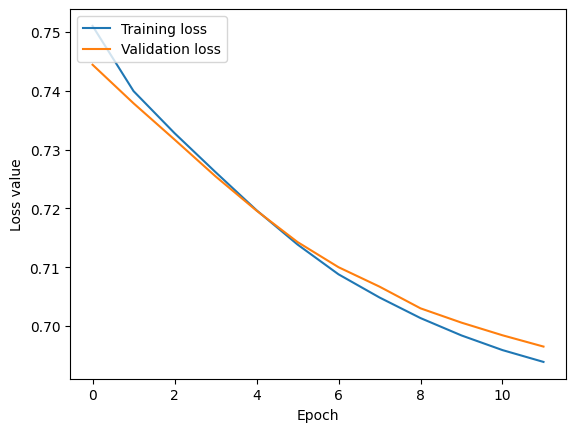


Alzheimer's Enhanced Class 2 - Loss


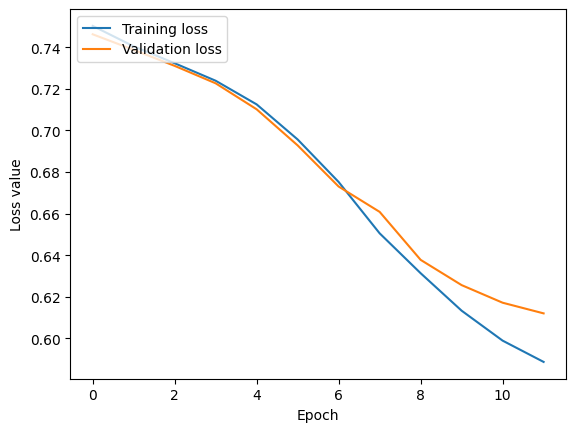


Alzheimer's Enhanced Class 3 - Loss


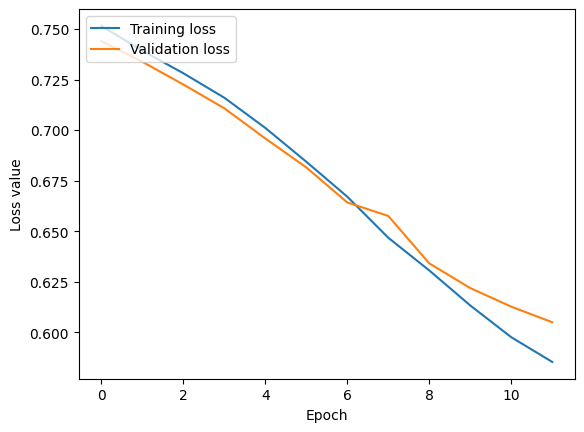


VGG19 Image Only - Loss


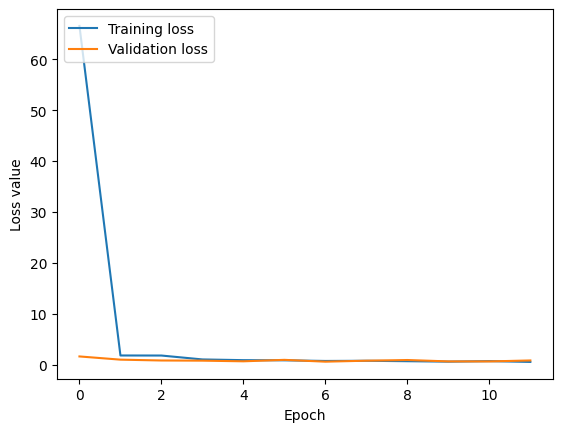


VGG19 Class 1 - Loss


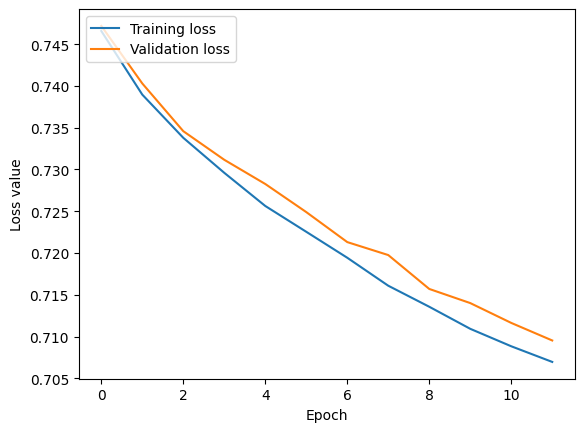


VGG19 Class 2 - Loss


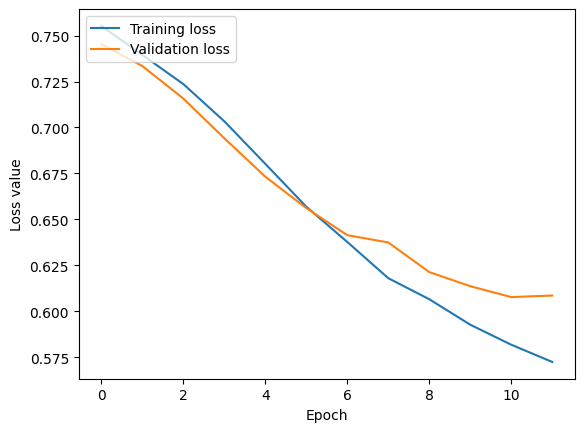


VGG19 Class 3 - Loss


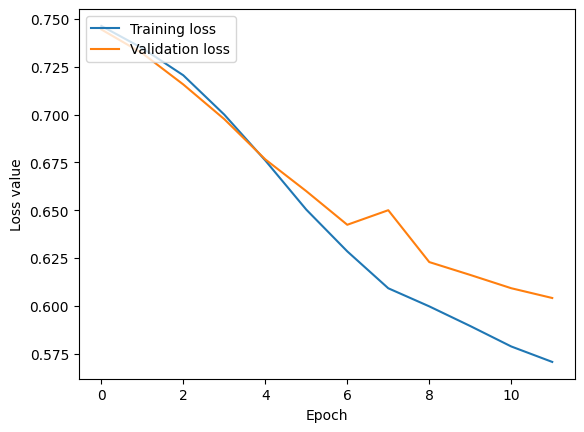


XCeption Image Only - Loss


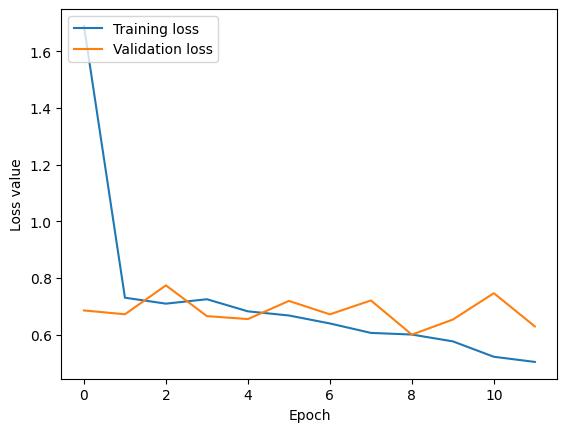


XCeption Class 1 - Loss


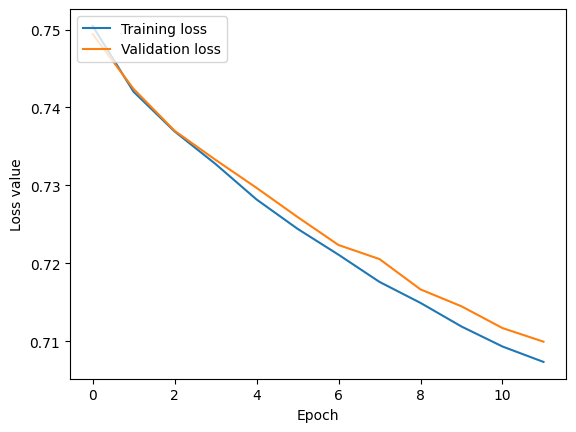


XCeption Class 2 - Loss


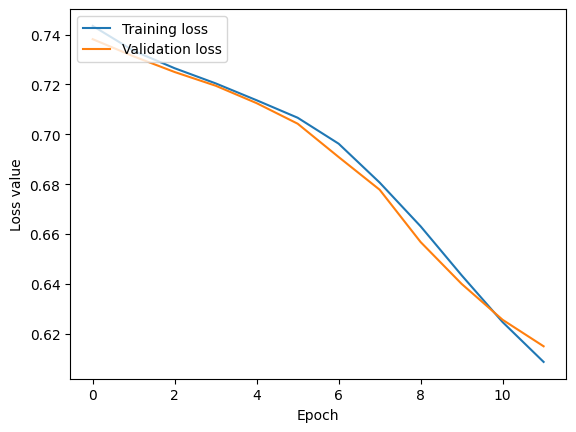


XCeption Class 3 - Loss


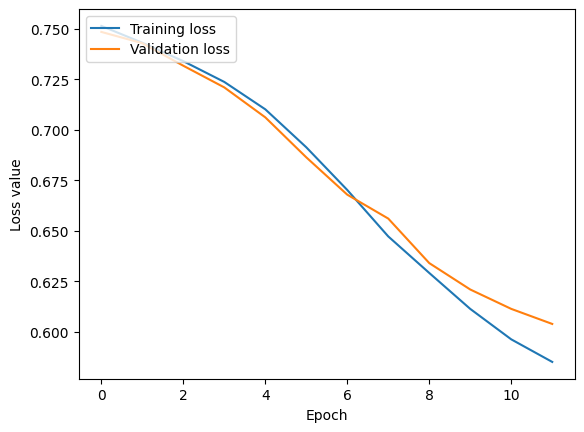

In [198]:
# Loss graphs without titles
print("\nCategorical Data Only Class 1 - Loss")
loss_graph(cat_1_fit_history.history, "")
print("\nCategorical Data Only Class 2 - Loss")
loss_graph(cat_2_fit_history.history, "")
print("\nCategorical Data Only Class 3 - Loss")
loss_graph(cat_3_fit_history.history, "")

print("\Alzheimer's Combo Class 1 - Loss")
loss_graph(og_combo_1_fit_history.history, "")
print("\Alzheimer's Combo Class 2 - Loss")
loss_graph(og_combo_2_fit_history.history, "")
print("\Alzheimer's Combo Class 3 - Loss")
loss_graph(og_combo_3_fit_history.history, "")

print("\nAlzheimer's Image Only - Loss")
loss_graph(og_0_fit_history.history, "")
print("\nAlzheimer's Enhanced Class 1 - Loss")
loss_graph(og_1_fit_history.history, "")
print("\nAlzheimer's Enhanced Class 2 - Loss")
loss_graph(og_2_fit_history.history, "")
print("\nAlzheimer's Enhanced Class 3 - Loss")
loss_graph(og_3_fit_history.history, "")

print("\nVGG19 Image Only - Loss")
loss_graph(vgg19_0_fit_history.history, "")
print("\nVGG19 Class 1 - Loss")
loss_graph(vgg19_1_fit_history.history, "")
print("\nVGG19 Class 2 - Loss")
loss_graph(vgg19_2_fit_history.history, "")
print("\nVGG19 Class 3 - Loss")
loss_graph(vgg19_3_fit_history.history, "")

print("\nXCeption Image Only - Loss")
loss_graph(xception_0_fit_history.history, "")
print("\nXCeption Class 1 - Loss")
loss_graph(xception_1_fit_history.history, "")
print("\nXCeption Class 2 - Loss")
loss_graph(xception_2_fit_history.history, "")
print("\nXCeption Class 3 - Loss")
loss_graph(xception_3_fit_history.history, "")

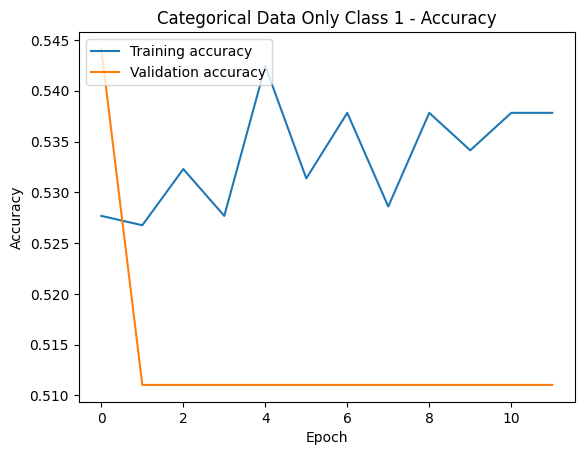

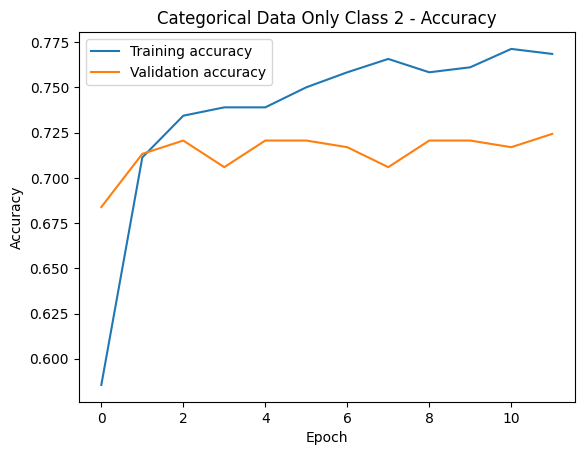

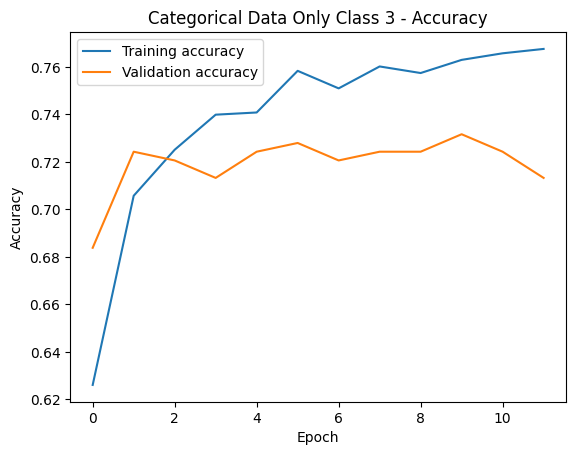

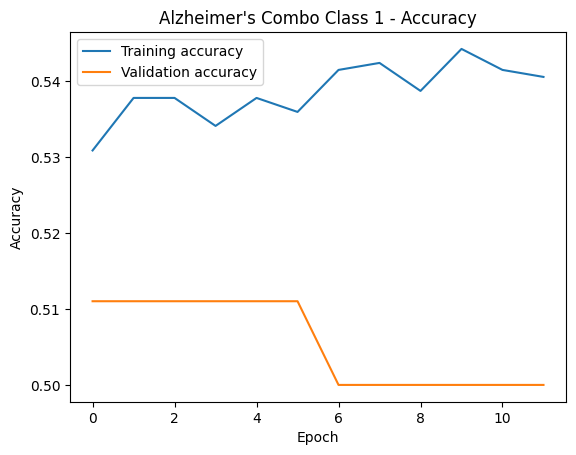

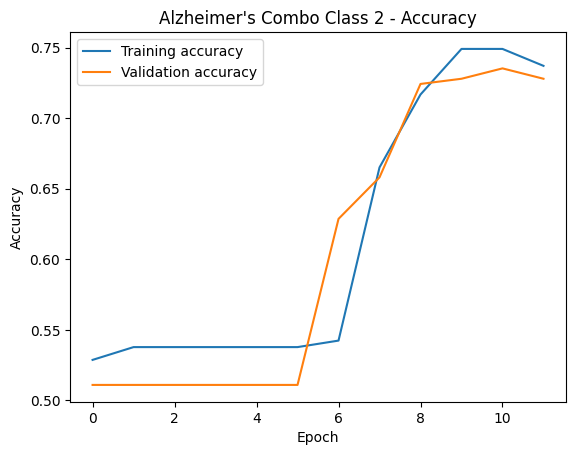

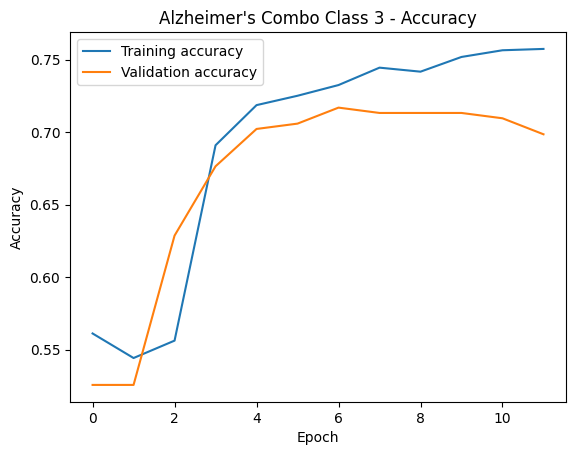

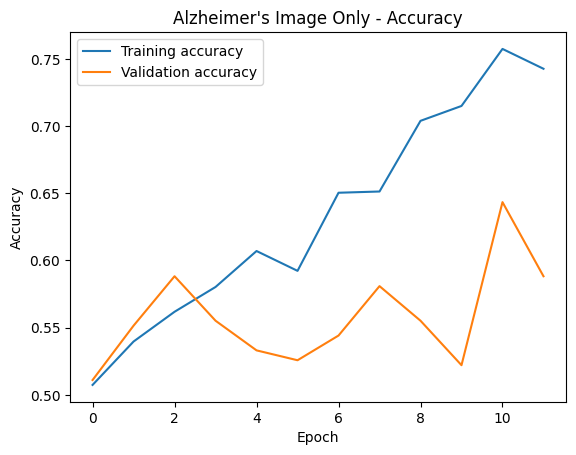

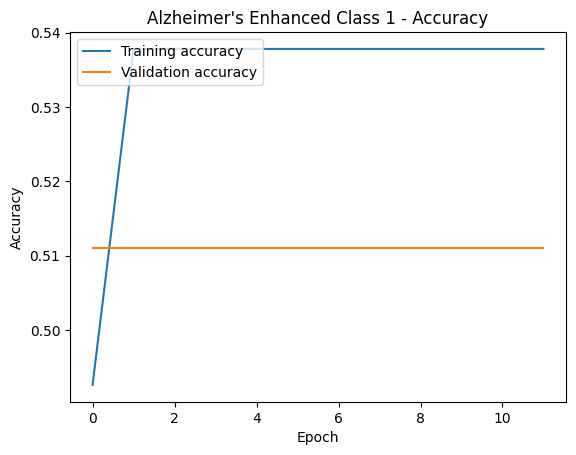

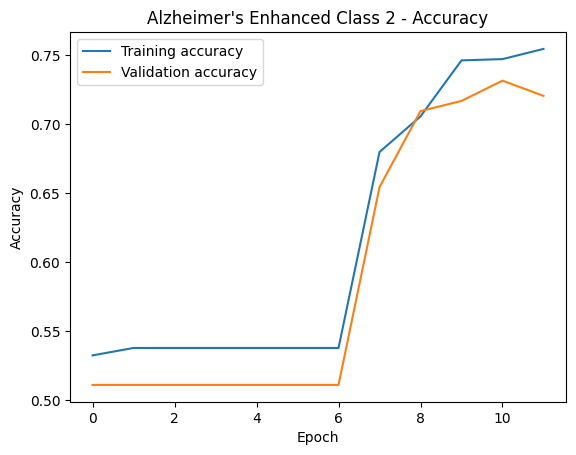

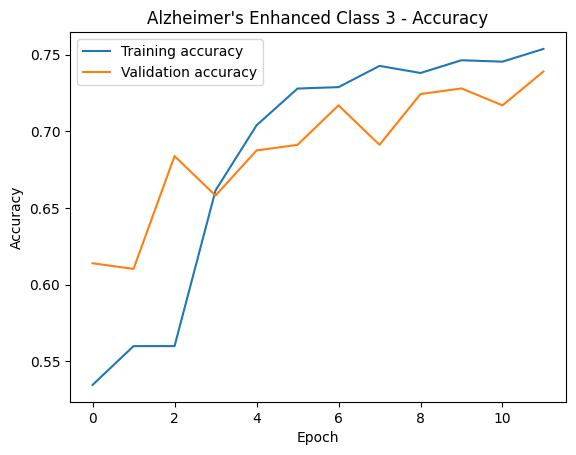

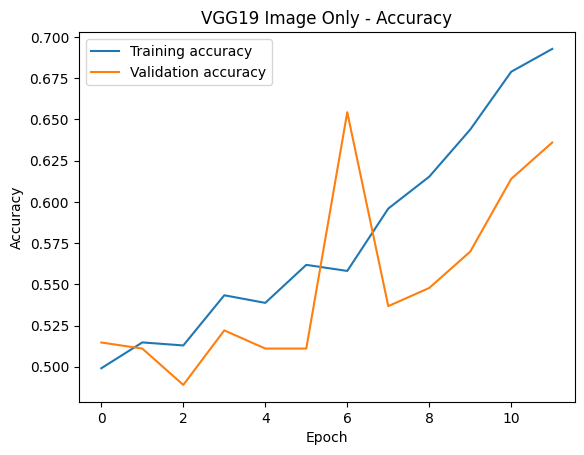

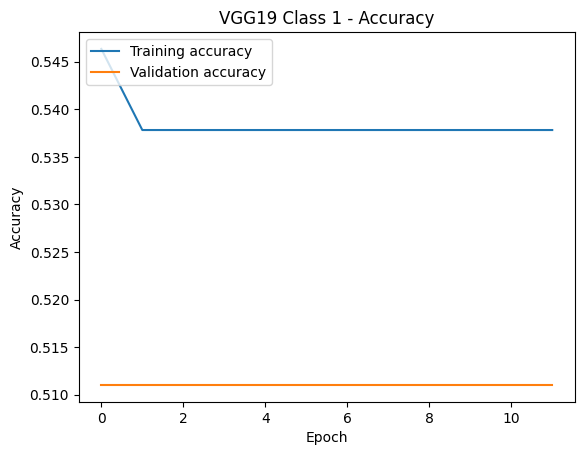

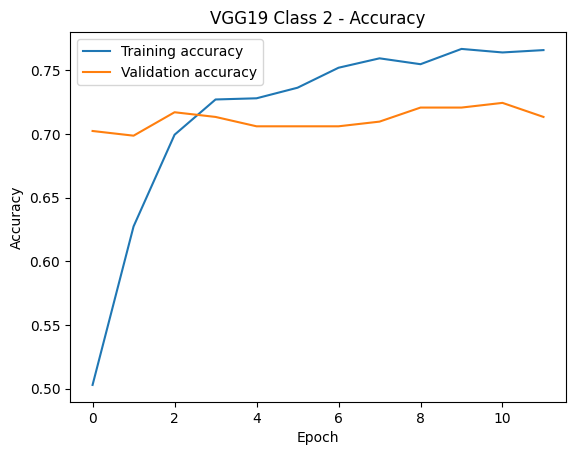

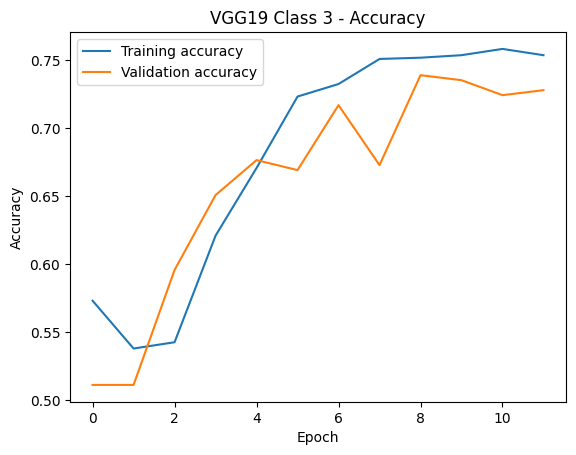

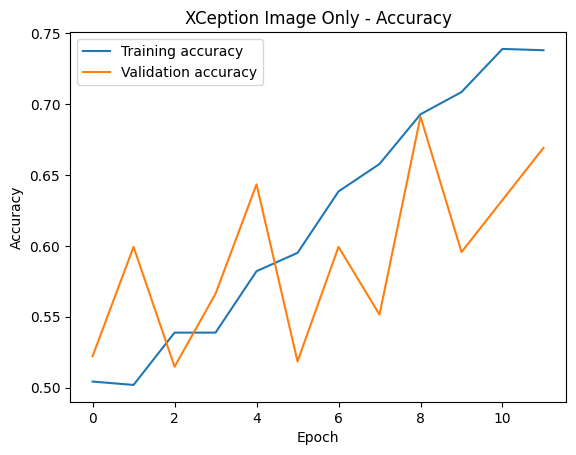

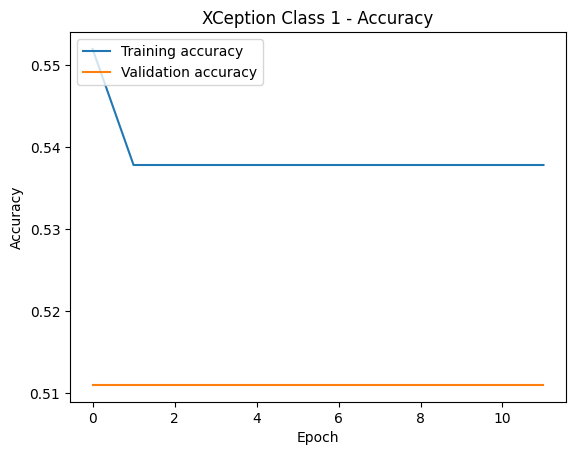

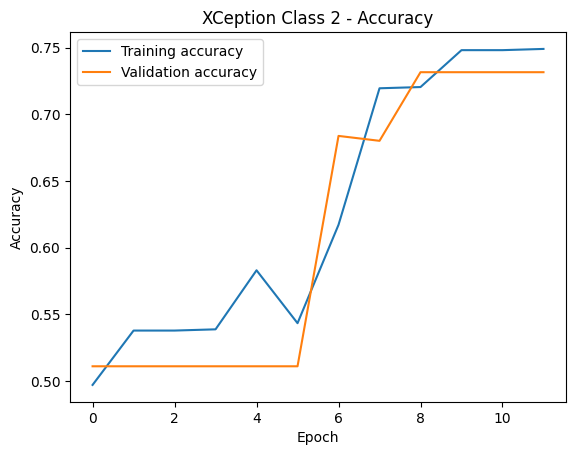

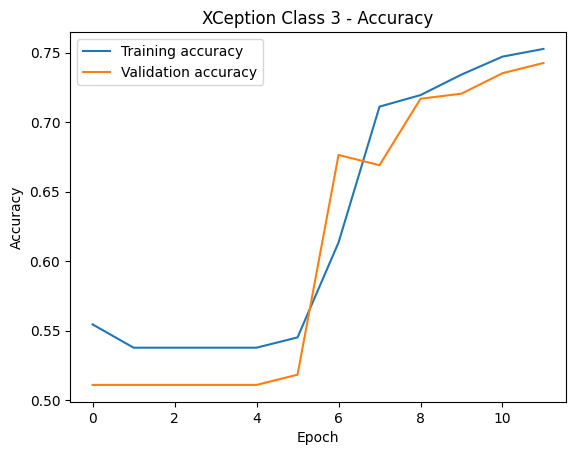

In [200]:
# Accuracy graphs
accuracy_graph(cat_1_fit_history.history, "Categorical Data Only Class 1 - Accuracy")
accuracy_graph(cat_2_fit_history.history, "Categorical Data Only Class 2 - Accuracy")
accuracy_graph(cat_3_fit_history.history, "Categorical Data Only Class 3 - Accuracy")

accuracy_graph(og_combo_1_fit_history.history, "Alzheimer's Combo Class 1 - Accuracy")
accuracy_graph(og_combo_2_fit_history.history, "Alzheimer's Combo Class 2 - Accuracy")
accuracy_graph(og_combo_3_fit_history.history, "Alzheimer's Combo Class 3 - Accuracy")

accuracy_graph(og_0_fit_history.history, "Alzheimer's Image Only - Accuracy")
accuracy_graph(og_1_fit_history.history, "Alzheimer's Enhanced Class 1 - Accuracy")
accuracy_graph(og_2_fit_history.history, "Alzheimer's Enhanced Class 2 - Accuracy")
accuracy_graph(og_3_fit_history.history, "Alzheimer's Enhanced Class 3 - Accuracy")

accuracy_graph(vgg19_0_fit_history.history, "VGG19 Image Only - Accuracy")
accuracy_graph(vgg19_1_fit_history.history, "VGG19 Class 1 - Accuracy")
accuracy_graph(vgg19_2_fit_history.history, "VGG19 Class 2 - Accuracy")
accuracy_graph(vgg19_3_fit_history.history, "VGG19 Class 3 - Accuracy")

accuracy_graph(xception_0_fit_history.history, "XCeption Image Only - Accuracy")
accuracy_graph(xception_1_fit_history.history, "XCeption Class 1 - Accuracy")
accuracy_graph(xception_2_fit_history.history, "XCeption Class 2 - Accuracy")
accuracy_graph(xception_3_fit_history.history, "XCeption Class 3 - Accuracy")


Categorical Data Only Class 1 - Accuracy


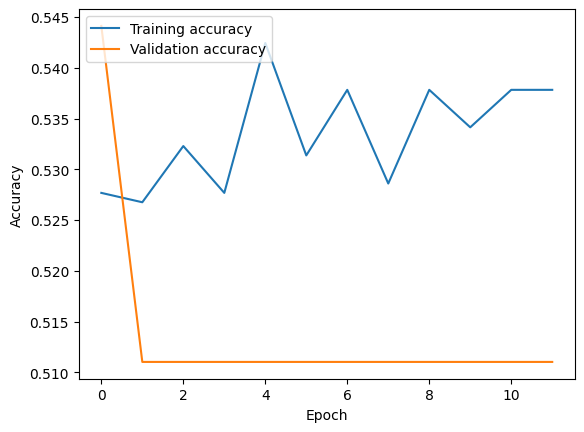


Categorical Data Only Class 2 - Accuracy


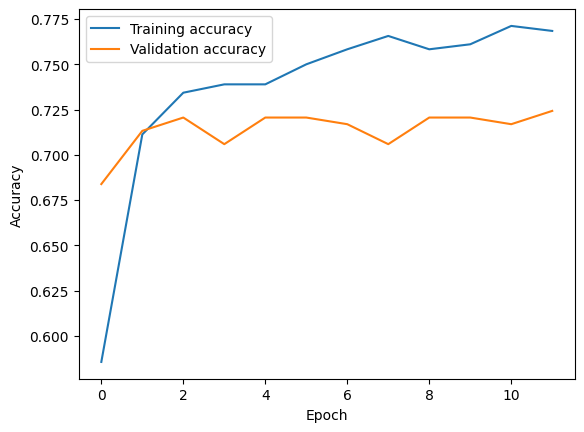


Categorical Data Only Class 3 - Accuracy


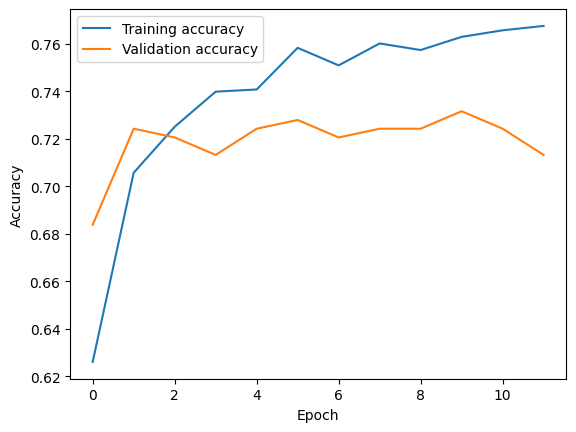


Alzheimer's Combo Class 1 - Accuracy


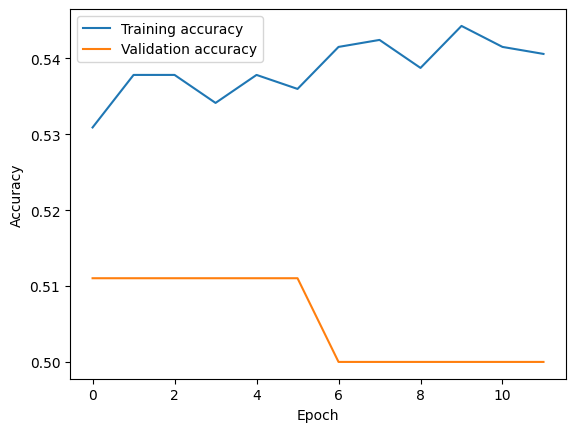


Alzheimer's Combo Class 2 - Accuracy


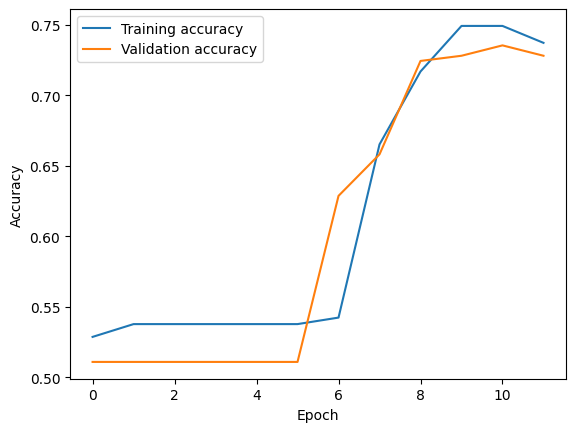


Alzheimer's Combo Class 3 - Accuracy


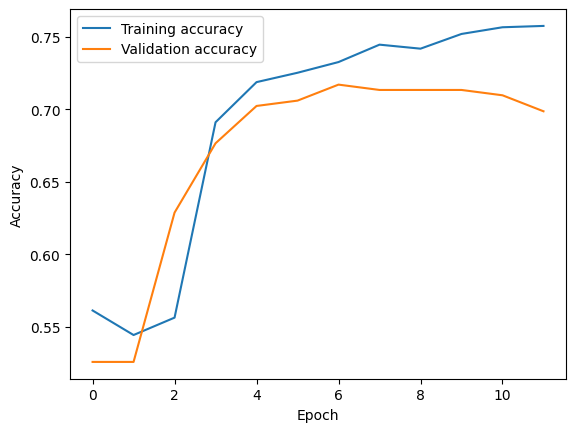


Alzheimer's Image Only - Accuracy


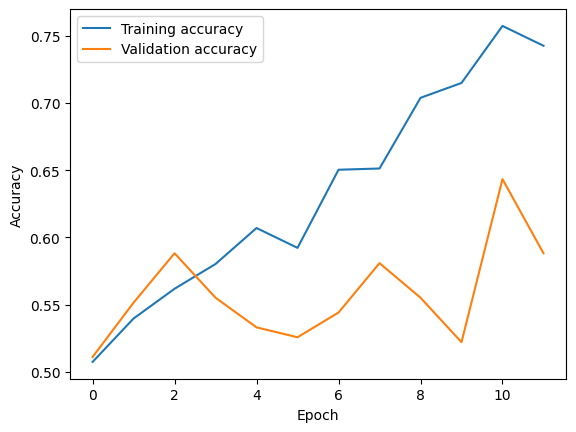


Alzheimer's Enhanced Class 1 - Accuracy


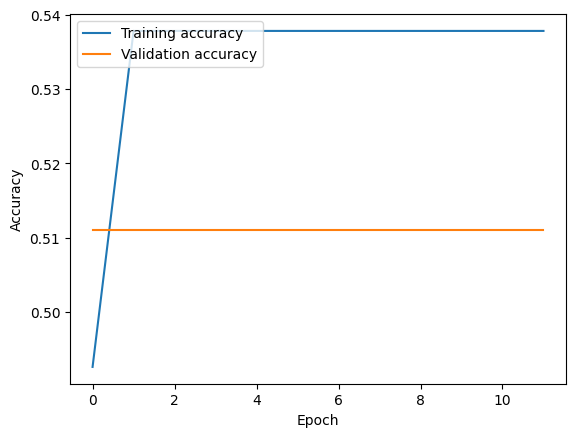


Alzheimer's Enhanced Class 2 - Accuracy


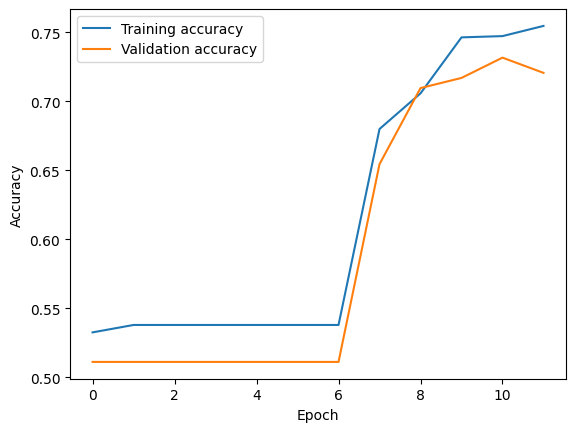


Alzheimer's Enhanced Class 3 - Accuracy


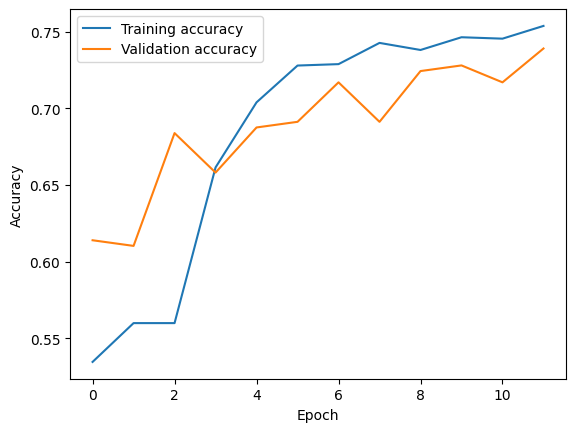


VGG19 Image Only - Accuracy


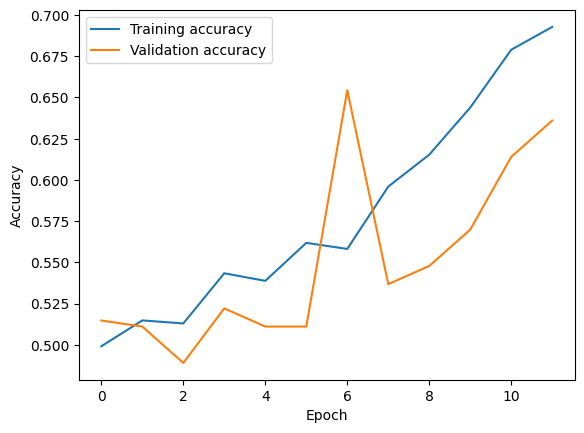


VGG19 Class 1 - Accuracy


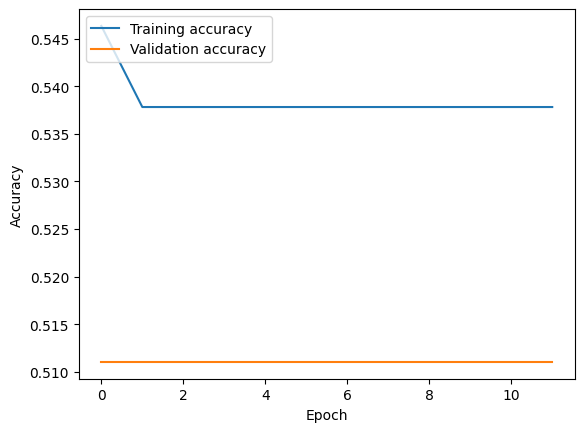


VGG19 Class 2 - Accuracy


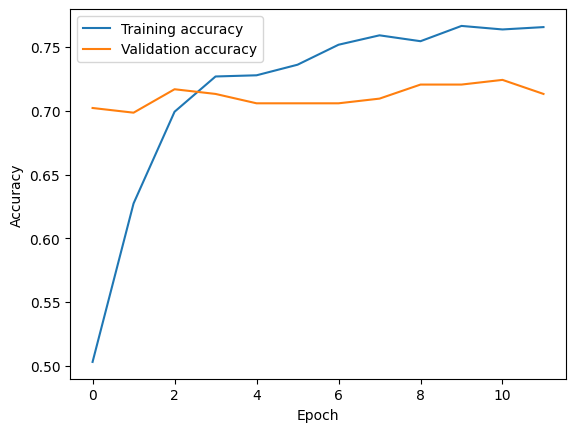


VGG19 Class 3 - Accuracy


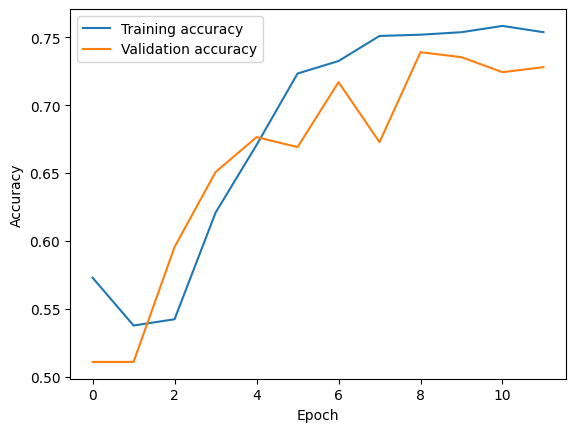


XCeption Image Only - Accuracy


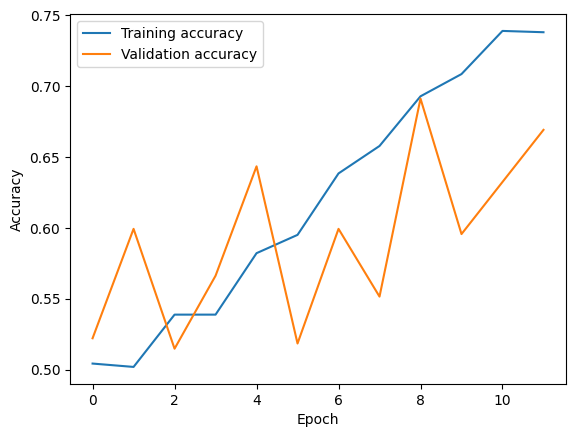


XCeption Class 1 - Accuracy


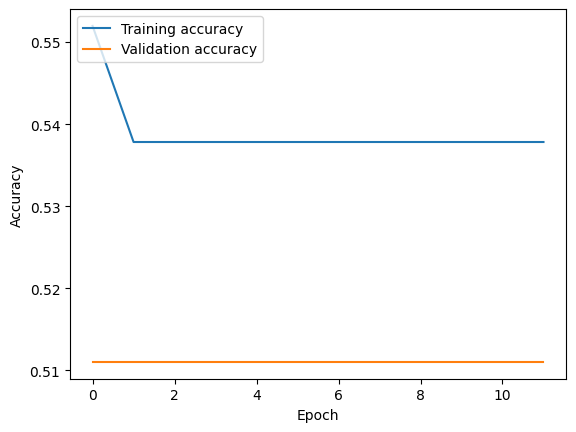


XCeption Class 2 - Accuracy


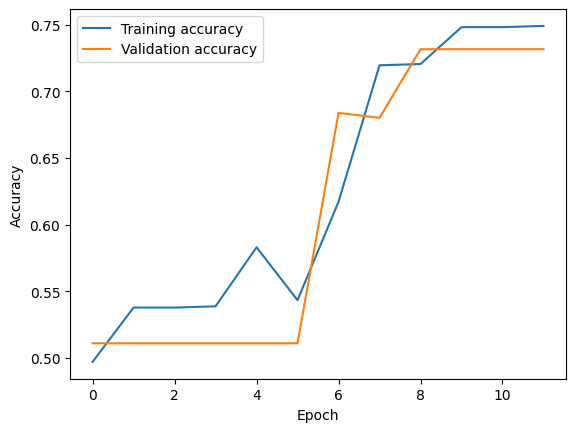


XCeption Class 3 - Accuracy


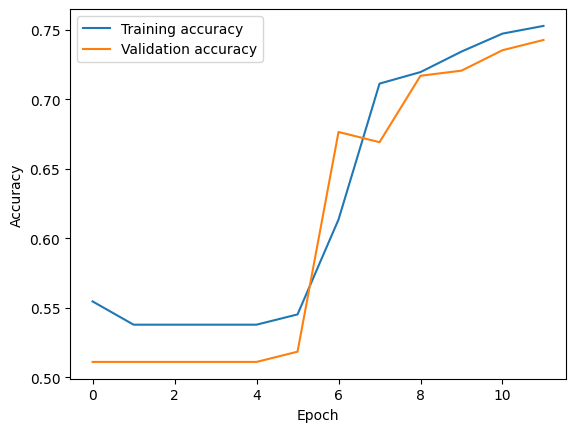

In [197]:
# Accuracy graphs without title
print("\nCategorical Data Only Class 1 - Accuracy")
accuracy_graph(cat_1_fit_history.history, "")
print("\nCategorical Data Only Class 2 - Accuracy")
accuracy_graph(cat_2_fit_history.history, "")
print("\nCategorical Data Only Class 3 - Accuracy")
accuracy_graph(cat_3_fit_history.history, "")

print("\nAlzheimer's Combo Class 1 - Accuracy")
accuracy_graph(og_combo_1_fit_history.history, "")
print("\nAlzheimer's Combo Class 2 - Accuracy")
accuracy_graph(og_combo_2_fit_history.history, "")
print("\nAlzheimer's Combo Class 3 - Accuracy")
accuracy_graph(og_combo_3_fit_history.history, "")

print("\nAlzheimer's Image Only - Accuracy")
accuracy_graph(og_0_fit_history.history, "")
print("\nAlzheimer's Enhanced Class 1 - Accuracy")
accuracy_graph(og_1_fit_history.history, "")
print("\nAlzheimer's Enhanced Class 2 - Accuracy")
accuracy_graph(og_2_fit_history.history, "")
print("\nAlzheimer's Enhanced Class 3 - Accuracy")
accuracy_graph(og_3_fit_history.history, "")

print("\nVGG19 Image Only - Accuracy")
accuracy_graph(vgg19_0_fit_history.history, "")
print("\nVGG19 Class 1 - Accuracy")
accuracy_graph(vgg19_1_fit_history.history, "")
print("\nVGG19 Class 2 - Accuracy")
accuracy_graph(vgg19_2_fit_history.history, "")
print("\nVGG19 Class 3 - Accuracy")
accuracy_graph(vgg19_3_fit_history.history, "")

print("\nXCeption Image Only - Accuracy")
accuracy_graph(xception_0_fit_history.history, "")
print("\nXCeption Class 1 - Accuracy")
accuracy_graph(xception_1_fit_history.history, "")
print("\nXCeption Class 2 - Accuracy")
accuracy_graph(xception_2_fit_history.history, "")
print("\nXCeption Class 3 - Accuracy")
accuracy_graph(xception_3_fit_history.history, "")


Categorical Data Only Class 1 - Recall
recall, precision, val_recall, val_precision


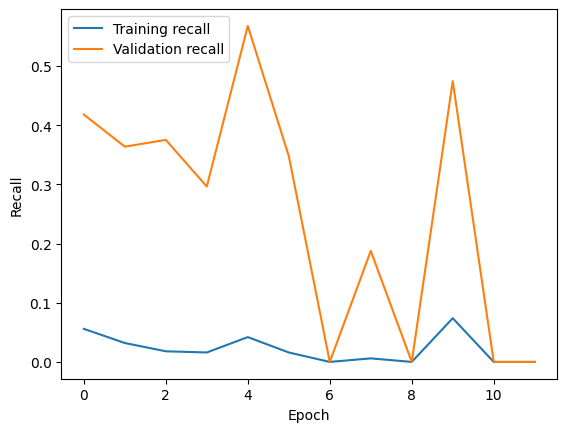


Categorical Data Only Class 2 - Recall
recall, precision, val_recall, val_precision


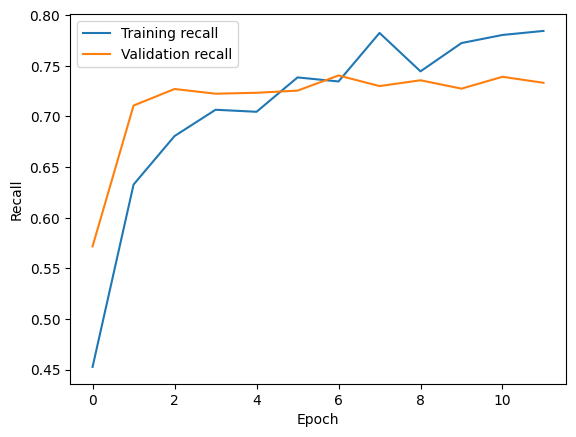


Categorical Data Only Class 3 - Recall
recall, precision, val_recall, val_precision


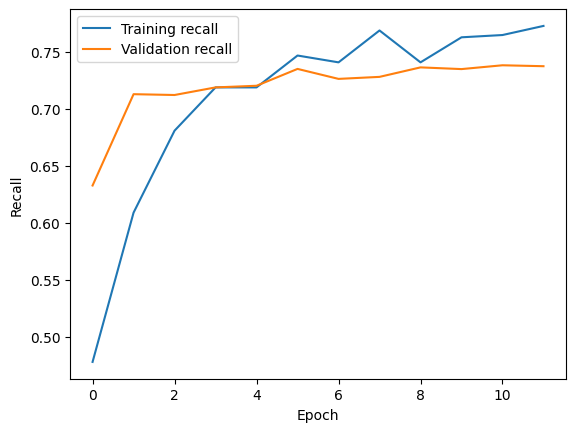


Alzheimer's Combo Class 1 - Recall
recall, precision, val_recall, val_precision


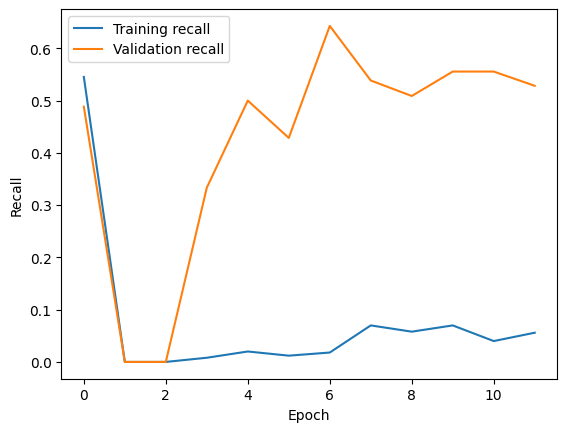


Alzheimer's Combo Class 2 - Recall
recall, precision, val_recall, val_precision


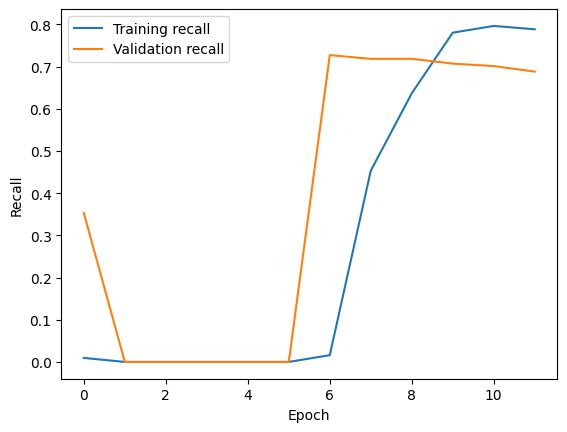


Alzheimer's Combo Class 3 - Recall
recall, precision, val_recall, val_precision


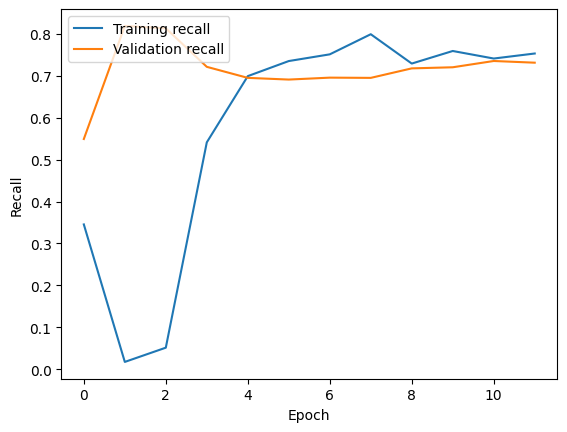


Alzheimer's Image Only - Recall
recall_9, precision_9, val_recall_9, val_precision_9


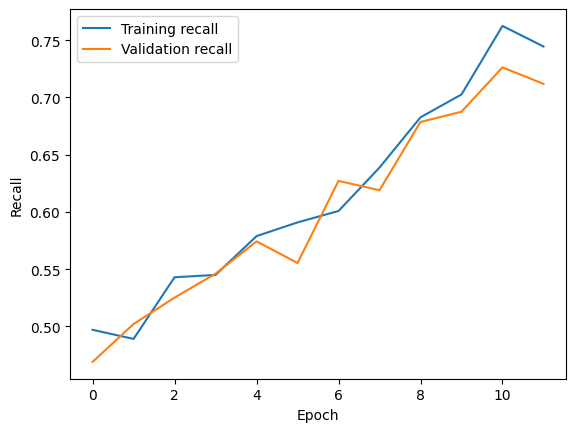


Alzheimer's Enhanced Class 1 - Recall
recall_8, precision_8, val_recall_8, val_precision_8


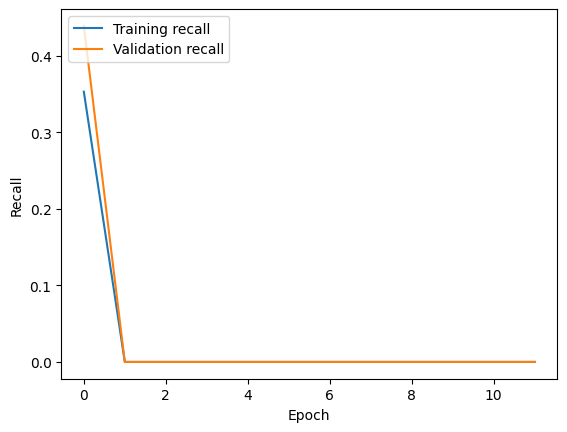


Alzheimer's Enhanced Class 2 - Recall
recall_8, precision_8, val_recall_8, val_precision_8


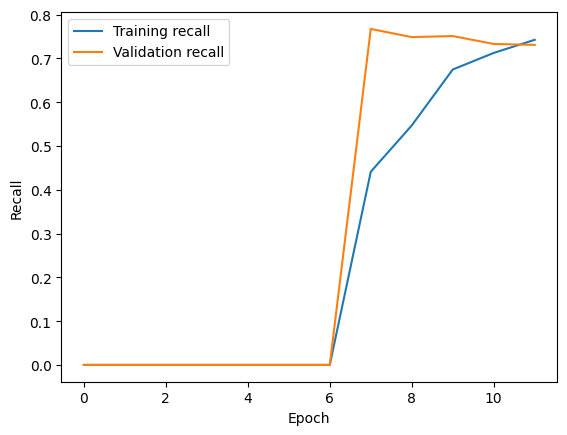


Alzheimer's Enhanced Class 3 - Recall
recall_8, precision_8, val_recall_8, val_precision_8


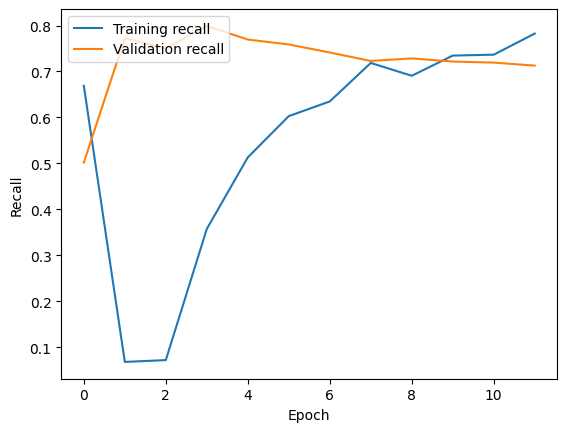


VGG19 Image Only - Recall
recall_2, precision_2, val_recall_2, val_precision_2


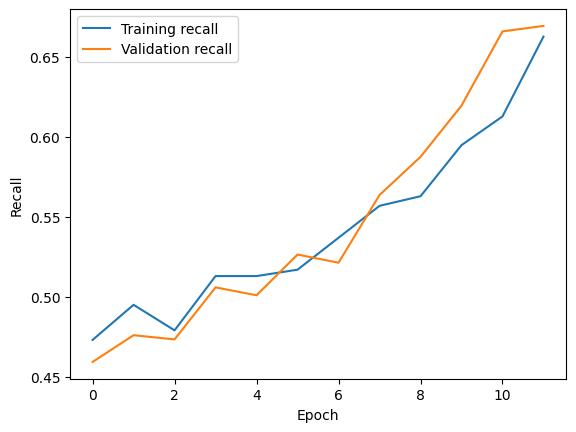


VGG19 Class 1 - Recall
recall_8, precision_8, val_recall_8, val_precision_8


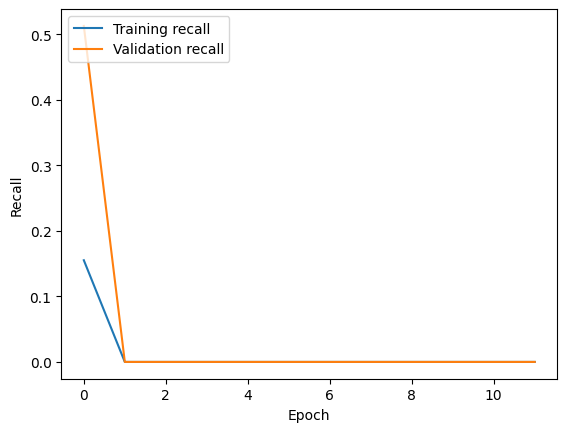


VGG19 Class 2 - Recall
recall_8, precision_8, val_recall_8, val_precision_8


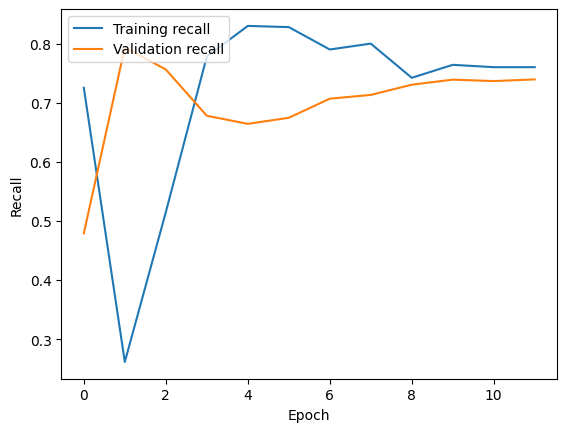


VGG19 Class 3 - Recall
recall_8, precision_8, val_recall_8, val_precision_8


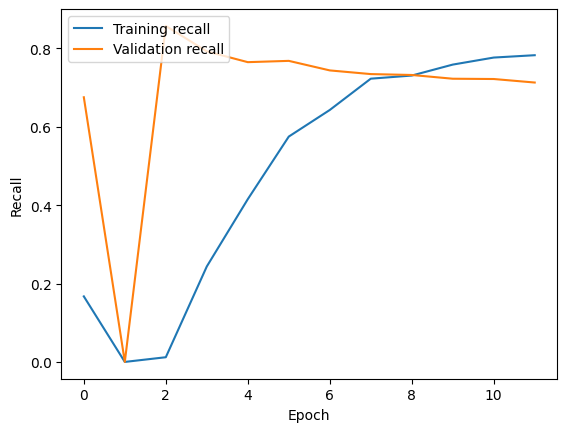


XCeption Image Only - Recall
recall_8, precision_8, val_recall_8, val_precision_8


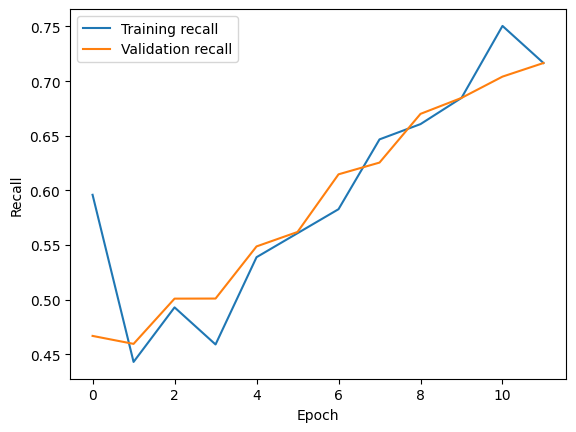


XCeption Class 1 - Recall
recall, precision, val_recall, val_precision


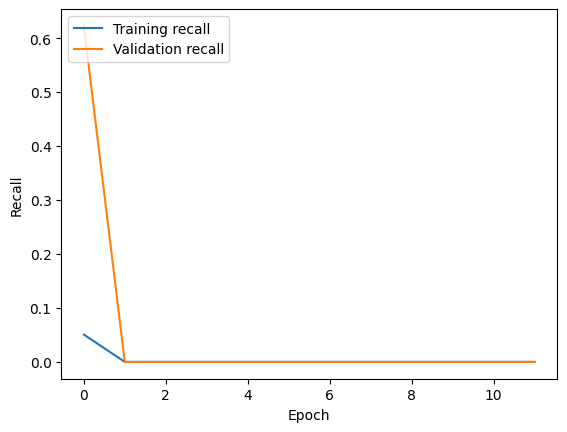


XCeption Class 2 - Recall
recall, precision, val_recall, val_precision


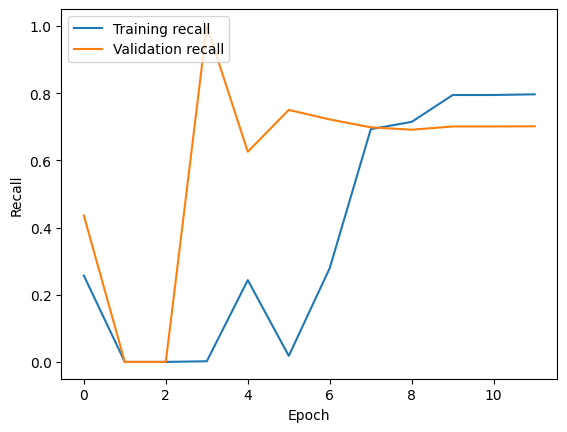


XCeption Class 3 - Recall
recall, precision, val_recall, val_precision


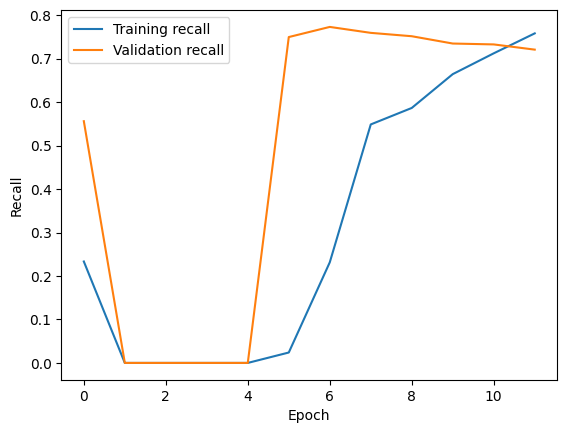

In [213]:
# Recall and precision graphs

print("\nCategorical Data Only Class 1 - Recall")
recall_graph(cat_1_fit_history.history, "")
print("\nCategorical Data Only Class 2 - Recall")
recall_graph(cat_2_fit_history.history, "")
print("\nCategorical Data Only Class 3 - Recall")
recall_graph(cat_3_fit_history.history, "")

print("\nAlzheimer's Combo Class 1 - Recall")
recall_graph(og_combo_1_fit_history.history, "")
print("\nAlzheimer's Combo Class 2 - Recall")
recall_graph(og_combo_2_fit_history.history, "")
print("\nAlzheimer's Combo Class 3 - Recall")
recall_graph(og_combo_3_fit_history.history, "")

print("\nAlzheimer's Image Only - Recall")
recall_graph(og_0_fit_history.history, "")
print("\nAlzheimer's Enhanced Class 1 - Recall")
recall_graph(og_1_fit_history.history, "")
print("\nAlzheimer's Enhanced Class 2 - Recall")
recall_graph(og_2_fit_history.history, "")
print("\nAlzheimer's Enhanced Class 3 - Recall")
recall_graph(og_3_fit_history.history, "")

print("\nVGG19 Image Only - Recall")
recall_graph(vgg19_0_fit_history.history, "")
print("\nVGG19 Class 1 - Recall")
recall_graph(vgg19_1_fit_history.history, "")
print("\nVGG19 Class 2 - Recall")
recall_graph(vgg19_2_fit_history.history, "")
print("\nVGG19 Class 3 - Recall")
recall_graph(vgg19_3_fit_history.history, "")

print("\nXCeption Image Only - Recall")
recall_graph(xception_0_fit_history.history, "")
print("\nXCeption Class 1 - Recall")
recall_graph(xception_1_fit_history.history, "")
print("\nXCeption Class 2 - Recall")
recall_graph(xception_2_fit_history.history, "")
print("\nXCeption Class 3 - Recall")
recall_graph(xception_3_fit_history.history, "")